# **LLM (Llama2) cuantizado con LoRA**

## Instalation de paquetes para COLAB

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="4"

In [2]:
import gc

gc.collect()

34

In [3]:
torch.cuda.empty_cache()

NameError: name 'torch' is not defined

Con bitsandbytes en un entorno Cuda, he ejecutado:
- !pip install --upgrade "transformers>=4.45.1" --quiet
- !pip install intel_extension_for_pytorch --quiet
- !pip install -U bitsandbytes --quiet
- !pip uninstall -y torch torchvision torchaudio numpy --quiet
- !pip install torch torchvision torchaudio numpy==1.26.4 --quiet # Evitar conflictos con NumPy 2.2.3
- !pip install --upgrade accelerate

In [1]:
%pip install --upgrade "transformers>=4.45.1" --quiet # Es necesario esta version para entorno cuda con cuantizacion (en colab)
%pip install intel_extension_for_pytorch --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 MB 8.2 MB/s eta 0:00:00


In [2]:
%pip install -U bitsandbytes --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.4 MB/s eta 0:00:00


In [3]:
%pip uninstall -y torch torchvision torchaudio numpy --quiet
%pip install torch torchvision torchaudio numpy==1.26.4 --quiet # Evitar conflictos con NumPy 2.2.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 80.3 MB/s eta 0:00:00


In [4]:
%pip install --upgrade accelerate --quiet #deepspeed

In [5]:
!pip install -U FlagEmbedding[finetune] --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 48.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 78.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.0/859.0 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.5 MB/s eta 0:00

## 📃 Código

### Imports

In [2]:
!nvidia-smi

Thu May 22 17:36:58 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.230.02             Driver Version: 535.230.02   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A40                     Off | 00000000:15:00.0 Off |                    0 |
|  0%   70C    P0             268W / 300W |  36038MiB / 46068MiB |     83%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
# Setting up the device for GPU usage
import torch
from torch import cuda
import json
import time
from huggingface_hub import list_datasets
from datasets import load_dataset
from datasets import Dataset, DownloadConfig
from torch.utils.data import Dataset, DataLoader
import sys
import pandas as pd

if torch.cuda.is_available():
    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs available: {num_gpus}")

    for i in range(num_gpus):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("CUDA is not available. Using CPU.")



Number of GPUs available: 1
GPU 0: NVIDIA GeForce RTX 3090


In [5]:
device = torch.device(f'cuda:0')

In [6]:
torch.cuda.get_device_name(device)

'NVIDIA GeForce RTX 3090'

In [7]:
print(f"Usando GPU: {device}")


Usando GPU: cuda:0


### Import Data from HuggingFace repository
We import training set for LoRA and val set from the following link: https://huggingface.co/datasets/JORGEDC01/Demo1


In [6]:
%pip install datasets --quiet

Note: you may need to restart the kernel to use updated packages.


In [8]:
datasets = list_datasets(author="JORGEDC01")

print([d.id for d in datasets])

['JORGEDC01/Demo1']


In [9]:
data_files = {"train": "e_train_distractors_LoRA_50k.jsonl", "val": "e_val_distractors_LoRA_split.jsonl", "test": "e_test_distractors_LoRA_split.jsonl"}

dataset = load_dataset("JORGEDC01/Demo1", data_dir="LoRA_Data/Distractors", data_files=data_files)
print(dataset)

train_dataset = dataset['train']
val_dataset = dataset['val']
test_dataset = dataset['test']

df_train = pd.DataFrame(train_dataset)
df_val = pd.DataFrame(val_dataset)
df_test = pd.DataFrame(test_dataset)

DatasetDict({
    train: Dataset({
        features: ['verifiable', 'label', 'claim', 'claim_embedding', 'evidence', 'distractors'],
        num_rows: 50907
    })
    val: Dataset({
        features: ['verifiable', 'label', 'claim', 'claim_embedding', 'evidence', 'distractors'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['verifiable', 'label', 'claim', 'claim_embedding', 'evidence', 'distractors'],
        num_rows: 9998
    })
})


In [10]:
df_train.head(2)

,verifiable,label,claim,claim_embedding,evidence,distractors
0,VERIFIABLE,REFUTES,Haitian Creole is a book.,"[-0.0263465252, 0.0131574152, 0.0542918034, -0...","[[-0.0293352734, -0.0057556927, -0.027055867, ...","[[-0.0384251662, -0.0133838328, 0.01634234, 0...."
1,VERIFIABLE,SUPPORTS,Loving tells the story of the 1967 U.S. Suprem...,"[-0.0248791277, 0.0372825973, -0.0372912735, -...","[[0.0082621714, 0.0273972452, 0.0013023725, 0....","[[-0.0435798131, 0.0392882265, 0.0211881492, -..."


In [10]:
from transformers import AutoModelForCausalLM, AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("unsloth/Llama-3.2-1B-bnb-4bit")

In [11]:
decoder = AutoModelForCausalLM.from_pretrained(
    "unsloth/Llama-3.2-1B-bnb-4bit",
)
decoder = decoder.to(device)

`low_cpu_mem_usage` was None, now default to True since model is quantized.


### CustomDataset
We'll prepare the dataset combining the embeddings generated by BGE. There are two types of labels:

* When label = `SUPPORTS`, then: label = 0
* When label = `REFUSES`, then: label = 1
* When label = `NOT ENOUGH INFO`, then: label = 2

In [11]:
class CustomDatasetComplejo(Dataset):
    def __init__(self, df, tokenizer, device):
        self.df = df
        self.tokenizer = tokenizer
        self.targets = self.df['label']
        self.device = device

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        row = self.df.iloc[index]

        ### Obtener embeddings precalculados
        emb_claim = torch.tensor(row['claim_embedding'], dtype=torch.float16).unsqueeze(0).to(self.device)  # (1, 384)
        emds_evidences = [torch.tensor(e, dtype=torch.float16).unsqueeze(0).to(self.device) for e in row['evidence']]
        filtered_evidences = [e for e in emds_evidences if e.shape == (1, 384)]
        embs_distractors = [torch.tensor(d, dtype=torch.float16).unsqueeze(0).to(self.device) for d in row['distractors']]

        encoder_bge_embeddings = torch.cat([emb_claim] + filtered_evidences + embs_distractors, dim=0).unsqueeze(0).to(self.device)  # (1, n, 384)

        label_map = {'SUPPORTS': 0, 'REFUTES': 1, 'NOT ENOUGH INFO': 2}
        label = torch.tensor(label_map[row['label']], dtype=torch.long).to(self.device)

        attention_mask = torch.ones(1, encoder_bge_embeddings.shape[1], dtype=torch.long, device=self.device)

        inputs = {
            "inputs_embeds": encoder_bge_embeddings,
            "attention_mask": attention_mask,
            "label": label,
        }

        return inputs


from torch.nn.utils.rnn import pad_sequence


def custom_collate_fn_complejo(batch):
    max_input_len = max(item['inputs_embeds'].size(1) for item in batch)  # Longitud máxima de inputs_embeds en el batch

    pad_token_embed = torch.zeros((1, 384), dtype=torch.float16).to(batch[0]['inputs_embeds'].device)  # Padding de ceros con tamaño 384

    padded_inputs = []
    padded_attention_mask = []
    labels = []

    for item in batch:
        ### Padding a los inputs_embeds hasta la longitud máxima (384 ya que no estamos proyectando)
        current_len = item['inputs_embeds'].size(1)
        padding_length = max_input_len - current_len
        if padding_length > 0:
            padding_embeds = pad_token_embed.expand(1, padding_length, -1)  # Expande el padding
            padded_emb = torch.cat([item['inputs_embeds'], padding_embeds], dim=1)
        else:
            padded_emb = item['inputs_embeds']  # Sin padding

        padded_inputs.append(padded_emb)

        ### Padding a la attention_mask
        padded_attention = torch.cat([item['attention_mask'], torch.zeros(1, padding_length, dtype=torch.long, device=item['attention_mask'].device)], dim=1)
        padded_attention_mask.append(padded_attention)

        ### Guardar labels
        labels.append(item['label'])

    inputs_embeds = torch.cat(padded_inputs, dim=0)  # [batch_size, max_seq_len, embedding_dim]
    attention_mask = torch.cat(padded_attention_mask, dim=0)  # [batch_size, max_seq_len]
    labels = torch.tensor(labels, dtype=torch.long, device=inputs_embeds.device)  # [batch_size]

    return {
        'inputs_embeds': inputs_embeds,
        'attention_mask': attention_mask,
        'labels': labels,
    }


In [12]:
def inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params):
    
    train_dataset = CustomDatasetComplejo(df_train, tokenizer, device)
    val_dataset = CustomDatasetComplejo(df_val, tokenizer, device)
    test_dataset = CustomDatasetComplejo(df_test, tokenizer, device)
    
    train_params = params
    
    val_params = params
    
    test_params = params
    
    training_loader = DataLoader(train_dataset, **train_params, collate_fn = custom_collate_fn_complejo)
    val_loader = DataLoader(val_dataset, **val_params, collate_fn = custom_collate_fn_complejo)
    test_loader = DataLoader(test_dataset, **test_params, collate_fn = custom_collate_fn_complejo)

    return training_loader, val_loader, test_loader

## **Experimentos**

### **Experimentos Individuales de optimización de LoRA**
*En las siguientes pruebas se busca la mejor configuración de LoRA.*

In [12]:
from torch.cuda.amp import autocast, GradScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def save_experiment(model_n, description, hyperparams, metrics, test_metrics, confusion_matrix, best_epoch, total_duration):
    experiment = {
        "id": model_n,
        "description": description,
        "hyperparameters": hyperparams,
        "metrics": metrics,
        "test_metrics": test_metrics,
        "confusion_matrix": confusion_matrix.tolist(),
        "best_epoch": best_epoch,
        "time_train": total_duration
    }
    
    try:
        with open("./initial_experiments_LoRA.json", "r") as f:
            experiments = json.load(f)
    except (FileNotFoundError, json.JSONDecodeError):
        experiments = []
    
    experiments.append(experiment)
    
    with open("./initial_experiments_LoRA.json", "w") as f:
        json.dump(experiments, f, indent=4)



''' -------------------------------------------------------------------------  '''
''' -------------------------------------------------------------------------  '''
''' -------------------------------------------------------------------------  '''

def evaluate_test(model, test_loader, best_model_path):
    
    checkpoint = torch.load(best_model_path, map_location=device)
    model.decoder.load_state_dict(checkpoint["lora"], strict=False)
    model.linear_projection.load_state_dict(checkpoint["projection"])
    model.classifier.load_state_dict(checkpoint["classifier"])
        
    model.eval()
    
    all_preds, all_labels = [], []
    all_labels = []
    with torch.no_grad():
        for data in test_loader:
            inputs_embeds = data['inputs_embeds'].to(device)
            attention_mask = data['attention_mask'].to(device).to(torch.float32)
            labels = data['labels'].to(device).long()
            
            logits = model(inputs_embeds, attention_mask)
            preds = torch.argmax(logits, dim=1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    acc = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
    test_metrics = {"accuracy": acc, "precision": precision, "recall": recall, "f1_score": f1}

    cm = confusion_matrix(all_labels, all_preds)
    
    print(f"Test Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    return test_metrics, cm
    


''' -------------------------------------------------------------------------  '''
''' -------------------------------------------------------------------------  '''
''' -------------------------------------------------------------------------  '''

def train(epochs, model, training_loader, val_loader, optimizer, learning_rate, batch_size, dropout, patience=3, model_n=0, description=""):
    model.train()
    model.to(device)  
    
    batches = len(training_loader)
    scaler = GradScaler()
    
    metrics = {"train": [], "val": []}
    total_start_time = time.time()
    best_val_loss = float('inf')
    best_model_path = f"./Models/LoRA_best_model_{model_n}.pth"
    no_improve_epochs = 0
        
    for epoch in range(epochs):
        total_loss = 0
        total_correct = 0
        total_samples = 0
        epoch_start_time = time.time()

        for i, data in enumerate(training_loader, 0):
            inputs_embeds = data['inputs_embeds'].to(device).to(model.decoder.dtype)
            attention_mask = data['attention_mask'].to(device).to(model.decoder.dtype)
            labels = data['labels'].to(device).long()
    
            optimizer.zero_grad()
            
            # for param in model.parameters():
            #     if param.requires_grad:
            #         param.data = param.data.to(torch.float16)
            #         if param.grad is not None:
            #             param.grad.data = param.grad.data.to(torch.float16)
    
            logits = model(inputs_embeds, attention_mask)
            loss = loss_fn(logits, labels)
    
            scaler.scale(loss).backward() # multiplica la pérdida por un factor de escala interno del GradScaler. Cuando trabajamos con float16, los gradientes pueden volverse muy pequeños (subdesbordamiento, es decir, se redondean a 0).
            scaler.unscale_(optimizer)    # Dado que scaler.scale(loss).backward() generó gradientes escalados, esta línea revierte el escalado. Si no se desescala, los gradientes serían demasiado grandes y la actualización del optimizador sería incorrecta.
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0) # Esto ayuda a evitar la explosión de gradientes, un problema donde los gradientes se vuelven tan grandes que la actualización de pesos se vuelve inestable.
            scaler.step(optimizer) 
            scaler.update()
            
            total_loss += loss.item()
            preds = torch.argmax(logits, dim=1)
            total_correct += (preds == labels).sum().item()
            total_samples += labels.size(0)
        
        train_loss = total_loss / batches
        train_acc = total_correct / total_samples
        
        # Evaluación
        model.eval()
        val_loss, all_preds, all_labels = 0, [], []
        with torch.no_grad():
            for data in val_loader:
                inputs_embeds = data['inputs_embeds'].to(device).to(model.decoder.dtype)
                attention_mask = data['attention_mask'].to(device).to(model.decoder.dtype)
                labels = data['labels'].to(device).long()
                
                logits = model(inputs_embeds, attention_mask)
                loss = loss_fn(logits, labels)
                val_loss += loss.item()
                preds = torch.argmax(logits, dim=1)
                
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        val_loss /= len(val_loader)
        acc = accuracy_score(all_labels, all_preds)
        precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')

        model.train()
        
        epoch_duration = (time.time() - epoch_start_time) / 60
        print(f"Epoch {epoch+1}/{epochs} | tr_loss: {train_loss:.4f}, tr_acc: {train_acc:.4f}, val_loss: {val_loss:.4f}, val_acc: {acc:.4f}, Prec: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

        
        metrics["train"].append({"epoch": epoch+1, "loss": train_loss, "accuracy": train_acc})
        metrics["val"].append({"epoch": epoch+1, "loss": val_loss, "accuracy": acc, "precision": precision, "recall": recall, "f1_score": f1})
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_epoch = epoch + 1
            #torch.save(model.state_dict(), best_model_path)
            torch.save({
                "lora": model.decoder.state_dict(),
                "classifier": model.classifier.state_dict(),
                "projection": model.linear_projection.state_dict(),
            }, best_model_path)
            
            no_improve_epochs = 0  # Reset counter
        else:
            no_improve_epochs += 1
        
        # Early stopping
        if no_improve_epochs >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs. No improvement in validation loss for {patience} consecutive epochs.")
            break
    
    total_duration = (time.time() - total_start_time) / 60  
    print(f"Total training time: {total_duration:.2f} min")
    
    test_metrics, cm = evaluate_test(model, test_loader, best_model_path)
    hyperparams = {"epochs": epochs, "optimizer": str(optimizer), "learning_rate": learning_rate, "batch_size": batch_size, "dropout": dropout, "patience": patience}
    save_experiment(model_n, description, hyperparams, metrics, test_metrics, cm, best_epoch, total_duration)

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Llama2Classifier_2(nn.Module):
    def __init__(self, decoder, size_llm, num_classes=3):
        super(Llama2Classifier_2, self).__init__()

        self.size_encoder_embds = 384  # Tamaño original de los embeddings contextuales
        self.size_llm_embds = size_llm # Tamaño de los embeddings proyectados
        self.num_classes = num_classes # Número de clases de salida
        self.decoder = decoder
        self.decoder = self.decoder.to(device)

        # Capa de proyección lineal de 384 a 2048 (como en el modelo Llama2_1B)
        self.linear_projection = nn.Linear(self.size_encoder_embds, self.size_llm_embds).to(dtype=self.decoder.dtype, device=self.decoder.device)

        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(self.size_llm_embds, self.num_classes).to(dtype=self.decoder.dtype, device=self.decoder.device)
        
        
    def forward(self, inputs_embeds, attention_mask):
        batch_size = inputs_embeds.size(0)
        encoder_embeds = [] 

        # (1) Proyección de los embeddings contextuales
        encoder_embeds = inputs_embeds  # Usamos los inputs_embeds tal cual están
        
        encoder_embeds = encoder_embeds.to(dtype=self.linear_projection.weight.dtype)
    
        # proyección de los embeddings contextuales a un tamaño de 2048
        projected_embeds = self.linear_projection(encoder_embeds)  # Proyección lineal
        
        projected_embeds = projected_embeds.to(dtype=self.decoder.dtype)
        attention_mask = attention_mask.to(device).to(self.decoder.dtype)
        
        decoder_output = self.decoder(
            inputs_embeds=projected_embeds,
            attention_mask=attention_mask,
            output_hidden_states=True
        )
        
        hidden_states = decoder_output.hidden_states  
        last_hidden_state = hidden_states[-1] # la última capa de hidden states

        aggregated_output = torch.sum(last_hidden_state, dim=1)  # Promedio las salidas
        aggregated_output = aggregated_output.to(device).to(self.decoder.dtype)

        logits = self.classifier(aggregated_output.to(self.classifier.weight.dtype))
        
        return logits  # Logits para la clasificación (dim: [batch_size, num_classes])

loss = torch.nn.CrossEntropyLoss()

def loss_fn(outputs, targets):
    targets = targets.long()  
    return loss(outputs, targets)

In [17]:
from collections import Counter

class_counts = Counter()

for batch in training_loader:
    labels = batch["labels"]  # o batch["target"], según cómo estén nombradas
    class_counts.update(labels.tolist())

print("Número de muestras por clase:", class_counts)

Número de muestras por clase: Counter({0: 28012, 2: 12474, 1: 10421})


#### E [1] - Opción

Óptimo:
- Batch size = 128
- learning_rate: 3e-4
- weight_decay: 1e-2
- betas: 0.9 , 0.95
- r = 4; lora_alpha = 16: lora_dropout = 0.1

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA RTX 4500 Ada Generation. Num GPUs = 1. Max memory: 23.656 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: Dropout = 0 is supported for fast patching. You are using dropout = 0.1.
Unsloth will patch all other layers, except LoRA matrices, causing a performance hit.
Unsloth 2025.3.19 patched 16 layers with 0 QKV layers, 0 O layers and 0 MLP layers.
/tmp/ipykernel_5545/158145151.py:86: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Epoch 1/20 | tr_loss: 1.3196, tr_acc: 0.6070, val_loss: 2.3394, val_acc: 0.4360, Prec: 0.7122, Recall: 0.4360, F1-score: 0.3360
Epoch 2/20 | tr_loss: 0.7810, tr_acc: 0.7315, val_loss: 1.1934, val_acc: 0.5794, Prec: 0.7283, Recall: 0.5794, F1-score: 0.5655
Epoch 3/20 | tr_loss: 0.5529, tr_acc: 0.7923, val_loss: 1.0147, val_acc: 0.6130, Prec: 0.7340, Recall: 0.6130, F1-score: 0.6073
Epoch 4/20 | tr_loss: 0.4993, tr_acc: 0.8117, val_loss: 0.8652, val_acc: 0.6611, Prec: 0.7370, Recall: 0.6611, F1-score: 0.6609
Epoch 5/20 | tr_loss: 0.4673, tr_acc: 0.8200, val_loss: 0.7224, val_acc: 0.7136, Prec: 0.7617, Recall: 0.7136, F1-score: 0.7103
Epoch 6/20 | tr_loss: 0.4307, tr_acc: 0.8308, val_loss: 0.7344, val_acc: 0.7234, Prec: 0.7765, Recall: 0.7234, F1-score: 0.7152
Epoch 7/20 | tr_loss: 0.4042, tr_acc: 0.8395, val_loss: 0.7837, val_acc: 0.6941, Prec: 0.7624, Recall: 0.6941, F1-score: 0.6932
Epoch 8/20 | tr_loss: 0.3930, tr_acc: 0.8432, val_loss: 0.8817, val_acc: 0.6632, Prec: 0.7494, Recall: 0

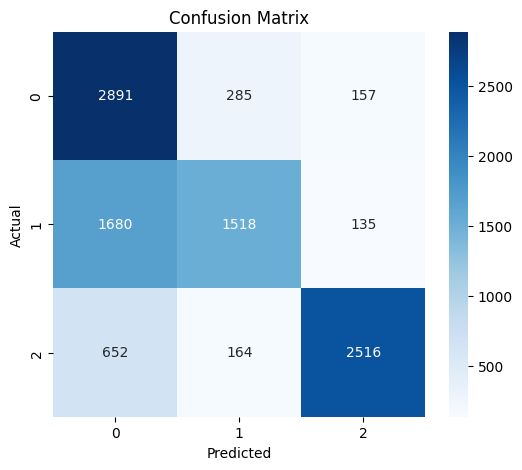

In [31]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None          # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True   # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 2x faster
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # 4bit for 405b

    "unsloth/Llama-3.2-1B-bnb-4bit",           
    "unsloth/Llama-3.2-1B-Instruct-bnb-4bit",
    "unsloth/Llama-3.2-3B-bnb-4bit",
    "unsloth/Llama-3.2-3B-Instruct-bnb-4bit",

    "unsloth/Llama-3.3-70B-Instruct-bnb-4bit" 
] 

decoder, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-1B-bnb-4bit", 
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    fast_inference=False
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)


model = FastLanguageModel.get_peft_model(
    decoder,
    r = 4,              # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0.1,    # Supports any, but = 0 is optimized
    bias = "none",       # Supports any, but = "none" is optimized
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)


model_complete = Llama2Classifier_2(model, 2048, num_classes=3)


params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)
model_name = "unsloth/Llama-3.2-1B-bnb-4bit"
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-2, betas=(0.9, 0.95))

lr = 3e-5
dropout = 0.3
batch_size = 128
model_n = 1

train(
    epochs=10,  
    model=model_complete,
    training_loader=training_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=3,
    model_n=model_n,
    description=f"Exp {model_n}: Modelo: {model_name} - AdamW, lr={lr}, dropout={dropout}, batch_size={batch_size}, modelo={model_name}",
)

#### E [2] - Descartado

Óptimo:
- Batch size = 128
- learning_rate: 3e-4
- weight_decay: 1e-2
- betas: 0.9 , 0.95
- r = 4; lora_alpha = 16: **lora_dropout = 0.2**

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA RTX 4500 Ada Generation. Num GPUs = 1. Max memory: 23.656 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: Dropout = 0 is supported for fast patching. You are using dropout = 0.2.
Unsloth will patch all other layers, except LoRA matrices, causing a performance hit.
Unsloth 2025.3.19 patched 16 layers with 0 QKV layers, 0 O layers and 0 MLP layers.
/tmp/ipykernel_7546/158145151.py:86: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Unsloth: Will smartly offload gradients to save VRAM!


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10 | tr_loss: 1.3053, tr_acc: 0.6012, val_loss: 3.1707, val_acc: 0.4274, Prec: 0.3960, Recall: 0.4274, F1-score: 0.3252
Epoch 2/10 | tr_loss: 0.8451, tr_acc: 0.7116, val_loss: 1.3588, val_acc: 0.5481, Prec: 0.7387, Recall: 0.5481, F1-score: 0.5248
Epoch 3/10 | tr_loss: 0.5786, tr_acc: 0.7852, val_loss: 1.2869, val_acc: 0.5586, Prec: 0.7243, Recall: 0.5586, F1-score: 0.5402
Epoch 4/10 | tr_loss: 0.5212, tr_acc: 0.8033, val_loss: 1.0980, val_acc: 0.5949, Prec: 0.7147, Recall: 0.5949, F1-score: 0.5888
Epoch 5/10 | tr_loss: 0.4955, tr_acc: 0.8082, val_loss: 1.0644, val_acc: 0.6368, Prec: 0.7346, Recall: 0.6368, F1-score: 0.6319
Epoch 6/10 | tr_loss: 0.4569, tr_acc: 0.8224, val_loss: 0.8477, val_acc: 0.6788, Prec: 0.7764, Recall: 0.6788, F1-score: 0.6714
Epoch 7/10 | tr_loss: 0.4434, tr_acc: 0.8271, val_loss: 1.0448, val_acc: 0.6505, Prec: 0.7669, Recall: 0.6505, F1-score: 0.6443
Epoch 8/10 | tr_loss: 0.4376, tr_acc: 0.8281, val_loss: 1.4539, val_acc: 0.5382, Prec: 0.7280, Recall: 0

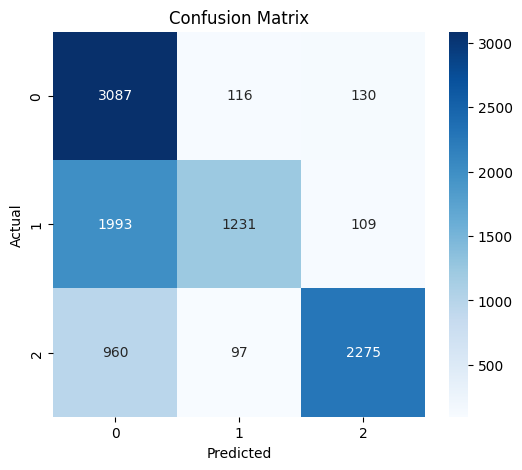

In [12]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None          # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True   # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 2x faster
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # 4bit for 405b

    "unsloth/Llama-3.2-1B-bnb-4bit",           
    "unsloth/Llama-3.2-1B-Instruct-bnb-4bit",
    "unsloth/Llama-3.2-3B-bnb-4bit",
    "unsloth/Llama-3.2-3B-Instruct-bnb-4bit",

    "unsloth/Llama-3.3-70B-Instruct-bnb-4bit" 
] 

decoder, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-1B-bnb-4bit", 
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    fast_inference=False
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)


model = FastLanguageModel.get_peft_model(
    decoder,
    r = 4,              # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0.2,    # Supports any, but = 0 is optimized
    bias = "none",       # Supports any, but = "none" is optimized
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)


model_complete = Llama2Classifier_2(model, 2048, num_classes=3)


params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)
model_name = "unsloth/Llama-3.2-1B-bnb-4bit"
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-2, betas=(0.9, 0.95))

lr = 3e-5
dropout = 0.3
batch_size = 128
model_n = 1

train(
    epochs=10,  
    model=model_complete,
    training_loader=training_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=3,
    model_n=model_n,
    description=f"Exp {model_n}: Modelo: {model_name} - AdamW, lr={lr}, dropout={dropout}, batch_size={batch_size}, modelo={model_name}",
)

#### E [3] - Descartado

Óptimo:
- Batch size = 128
- learning_rate: 3e-4
- weight_decay: 1e-2
- **betas: 0.7 , 0.75**
- r = 4; lora_alpha = 16: lora_dropout = 0.1

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA RTX 4500 Ada Generation. Num GPUs = 1. Max memory: 23.656 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


/tmp/ipykernel_7546/158145151.py:86: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10 | tr_loss: 1.3684, tr_acc: 0.5965, val_loss: 3.7164, val_acc: 0.4011, Prec: 0.4077, Recall: 0.4011, F1-score: 0.2886
Epoch 2/10 | tr_loss: 0.8079, tr_acc: 0.7175, val_loss: 1.3694, val_acc: 0.5348, Prec: 0.6469, Recall: 0.5348, F1-score: 0.5093
Epoch 3/10 | tr_loss: 0.5607, tr_acc: 0.7871, val_loss: 0.7686, val_acc: 0.6743, Prec: 0.6983, Recall: 0.6743, F1-score: 0.6808
Epoch 4/10 | tr_loss: 0.5065, tr_acc: 0.8068, val_loss: 1.5101, val_acc: 0.5181, Prec: 0.7510, Recall: 0.5181, F1-score: 0.4836
Epoch 5/10 | tr_loss: 0.4723, tr_acc: 0.8186, val_loss: 0.7787, val_acc: 0.6962, Prec: 0.7382, Recall: 0.6962, F1-score: 0.6991
Epoch 6/10 | tr_loss: 0.4384, tr_acc: 0.8276, val_loss: 1.0605, val_acc: 0.6313, Prec: 0.7595, Recall: 0.6313, F1-score: 0.6249
Early stopping triggered after 6 epochs. No improvement in validation loss for 3 consecutive epochs.
Total training time: 14.89 min
Test Accuracy: 0.6596, Precision: 0.6847, Recall: 0.6596, F1-score: 0.6660


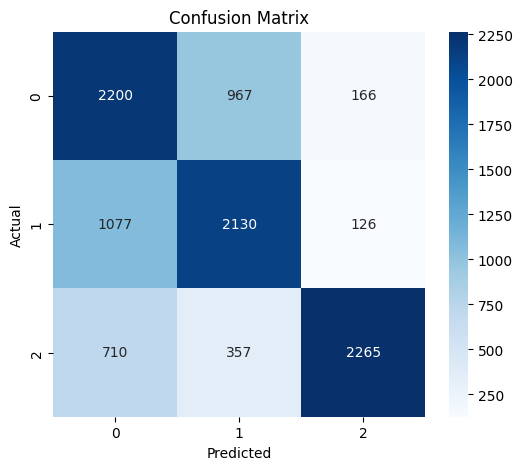

In [22]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None          # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True   # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 2x faster
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # 4bit for 405b

    "unsloth/Llama-3.2-1B-bnb-4bit",           
    "unsloth/Llama-3.2-1B-Instruct-bnb-4bit",
    "unsloth/Llama-3.2-3B-bnb-4bit",
    "unsloth/Llama-3.2-3B-Instruct-bnb-4bit",

    "unsloth/Llama-3.3-70B-Instruct-bnb-4bit" 
] 

decoder, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-1B-bnb-4bit", 
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    fast_inference=False
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)


model = FastLanguageModel.get_peft_model(
    decoder,
    r = 4,              # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0.1,    # Supports any, but = 0 is optimized
    bias = "none",       # Supports any, but = "none" is optimized
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)


model_complete = Llama2Classifier_2(model, 2048, num_classes=3)


params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)
model_name = "unsloth/Llama-3.2-1B-bnb-4bit"
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-2, betas=(0.7, 0.75))

lr = 3e-5
dropout = 0.3
batch_size = 128
model_n = 1

train(
    epochs=10,  
    model=model_complete,
    training_loader=training_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=3,
    model_n=model_n,
    description=f"Exp {model_n}: Modelo: {model_name} - AdamW, lr={lr}, dropout={dropout}, batch_size={batch_size}, modelo={model_name}",
)

---
#### E [4 y 5] - Opción más equilibrada entre etiquetas 0 y 1

Óptimo:
- Batch size = 128
- learning_rate: 3e-4
- weight_decay: 5e-2
- betas: 0.7 , 0.75
- r = 4; lora_alpha = 16: lora_dropout = 0.1

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA RTX 4500 Ada Generation. Num GPUs = 1. Max memory: 23.656 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


/tmp/ipykernel_57/158145151.py:86: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10 | tr_loss: 1.3309, tr_acc: 0.5872, val_loss: 3.1062, val_acc: 0.3877, Prec: 0.4053, Recall: 0.3877, F1-score: 0.2678
Epoch 2/10 | tr_loss: 0.8182, tr_acc: 0.7192, val_loss: 1.2832, val_acc: 0.5477, Prec: 0.6578, Recall: 0.5477, F1-score: 0.5285
Epoch 3/10 | tr_loss: 0.5586, tr_acc: 0.7879, val_loss: 1.0497, val_acc: 0.5794, Prec: 0.7223, Recall: 0.5794, F1-score: 0.5661
Epoch 4/10 | tr_loss: 0.5094, tr_acc: 0.8082, val_loss: 1.1039, val_acc: 0.6428, Prec: 0.7737, Recall: 0.6428, F1-score: 0.6323
Epoch 5/10 | tr_loss: 0.4678, tr_acc: 0.8195, val_loss: 0.8689, val_acc: 0.6723, Prec: 0.7477, Recall: 0.6723, F1-score: 0.6710
Epoch 6/10 | tr_loss: 0.4286, tr_acc: 0.8320, val_loss: 0.9808, val_acc: 0.6455, Prec: 0.7553, Recall: 0.6455, F1-score: 0.6419
Epoch 7/10 | tr_loss: 0.4112, tr_acc: 0.8365, val_loss: 0.7739, val_acc: 0.7078, Prec: 0.7536, Recall: 0.7078, F1-score: 0.7080
Epoch 8/10 | tr_loss: 0.3930, tr_acc: 0.8440, val_loss: 0.9938, val_acc: 0.6407, Prec: 0.7635, Recall: 0

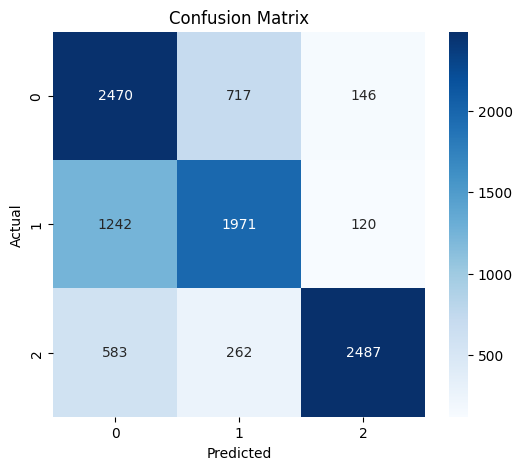

In [15]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None          # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True   # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 2x faster
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # 4bit for 405b

    "unsloth/Llama-3.2-1B-bnb-4bit",           
    "unsloth/Llama-3.2-1B-Instruct-bnb-4bit",
    "unsloth/Llama-3.2-3B-bnb-4bit",
    "unsloth/Llama-3.2-3B-Instruct-bnb-4bit",

    "unsloth/Llama-3.3-70B-Instruct-bnb-4bit" 
] 

decoder, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-1B-bnb-4bit", 
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    fast_inference=False
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)


model = FastLanguageModel.get_peft_model(
    decoder,
    r = 4,              # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0.1,    # Supports any, but = 0 is optimized
    bias = "none",       # Supports any, but = "none" is optimized
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)


model_complete = Llama2Classifier_2(model, 2048, num_classes=3)


params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)
model_name = "unsloth/Llama-3.2-1B-bnb-4bit"
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=5e-2, betas=(0.7, 0.75))

lr = 3e-5
dropout = 0.3
batch_size = 128
model_n = 1

train(
    epochs=10,  
    model=model_complete,
    training_loader=training_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=3,
    model_n=model_n,
    description=f"Exp {model_n}: Modelo: {model_name} - AdamW, lr={lr}, dropout={dropout}, batch_size={batch_size}, modelo={model_name}",
)

Óptimo:
- Batch size = 128
- learning_rate: 3e-4
- weight_decay: 5e-2
- **betas: 0.5 , 0.5**
- r = 4; lora_alpha = 16: lora_dropout = 0.1

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA RTX 4500 Ada Generation. Num GPUs = 1. Max memory: 23.656 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


/tmp/ipykernel_57/158145151.py:86: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10 | tr_loss: 1.3874, tr_acc: 0.5823, val_loss: 2.7866, val_acc: 0.4503, Prec: 0.3281, Recall: 0.4503, F1-score: 0.3576
Epoch 2/10 | tr_loss: 0.8498, tr_acc: 0.7097, val_loss: 1.2265, val_acc: 0.5423, Prec: 0.6917, Recall: 0.5423, F1-score: 0.5207
Epoch 3/10 | tr_loss: 0.5699, tr_acc: 0.7835, val_loss: 0.6709, val_acc: 0.7210, Prec: 0.7366, Recall: 0.7210, F1-score: 0.7174
Epoch 4/10 | tr_loss: 0.5099, tr_acc: 0.8055, val_loss: 0.7957, val_acc: 0.6802, Prec: 0.7496, Recall: 0.6802, F1-score: 0.6741
Epoch 5/10 | tr_loss: 0.4754, tr_acc: 0.8179, val_loss: 0.6854, val_acc: 0.7197, Prec: 0.7403, Recall: 0.7197, F1-score: 0.7207
Epoch 6/10 | tr_loss: 0.4302, tr_acc: 0.8307, val_loss: 0.8372, val_acc: 0.6729, Prec: 0.7593, Recall: 0.6729, F1-score: 0.6715
Early stopping triggered after 6 epochs. No improvement in validation loss for 3 consecutive epochs.
Total training time: 15.15 min
Test Accuracy: 0.6975, Precision: 0.7132, Recall: 0.6975, F1-score: 0.6952


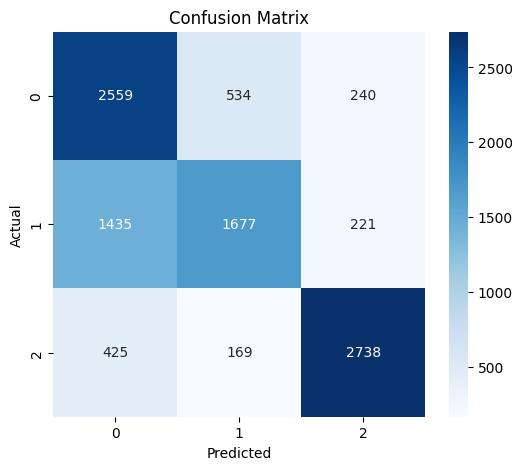

In [16]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None          # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True   # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 2x faster
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # 4bit for 405b

    "unsloth/Llama-3.2-1B-bnb-4bit",           
    "unsloth/Llama-3.2-1B-Instruct-bnb-4bit",
    "unsloth/Llama-3.2-3B-bnb-4bit",
    "unsloth/Llama-3.2-3B-Instruct-bnb-4bit",

    "unsloth/Llama-3.3-70B-Instruct-bnb-4bit" 
] 

decoder, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-1B-bnb-4bit", 
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    fast_inference=False
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)


model = FastLanguageModel.get_peft_model(
    decoder,
    r = 4,              # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0.1,    # Supports any, but = 0 is optimized
    bias = "none",       # Supports any, but = "none" is optimized
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)


model_complete = Llama2Classifier_2(model, 2048, num_classes=3)


params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)
model_name = "unsloth/Llama-3.2-1B-bnb-4bit"
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=5e-2, betas=(0.5, 0.5))

lr = 3e-5
dropout = 0.3
batch_size = 128
model_n = 1

train(
    epochs=10,  
    model=model_complete,
    training_loader=training_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=3,
    model_n=model_n,
    description=f"Exp {model_n}: Modelo: {model_name} - AdamW, lr={lr}, dropout={dropout}, batch_size={batch_size}, modelo={model_name}",
)

**betas: 0.9, 9.99** - DESCARTADO

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA RTX 4500 Ada Generation. Num GPUs = 1. Max memory: 23.656 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


/tmp/ipykernel_3382/158145151.py:86: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10 | tr_loss: 1.2532, tr_acc: 0.5836, val_loss: 1.8371, val_acc: 0.4532, Prec: 0.3630, Recall: 0.4532, F1-score: 0.3582
Epoch 2/10 | tr_loss: 0.8967, tr_acc: 0.6668, val_loss: 1.2626, val_acc: 0.4697, Prec: 0.6795, Recall: 0.4697, F1-score: 0.3906
Epoch 3/10 | tr_loss: 0.7200, tr_acc: 0.7298, val_loss: 1.1714, val_acc: 0.5391, Prec: 0.7301, Recall: 0.5391, F1-score: 0.5135
Epoch 4/10 | tr_loss: 0.5693, tr_acc: 0.7772, val_loss: 0.9680, val_acc: 0.5543, Prec: 0.6664, Recall: 0.5543, F1-score: 0.5330
Epoch 5/10 | tr_loss: 0.5349, tr_acc: 0.7933, val_loss: 0.8664, val_acc: 0.6104, Prec: 0.6936, Recall: 0.6104, F1-score: 0.6052
Epoch 6/10 | tr_loss: 0.4991, tr_acc: 0.8089, val_loss: 0.8125, val_acc: 0.6442, Prec: 0.7350, Recall: 0.6442, F1-score: 0.6416
Epoch 7/10 | tr_loss: 0.4910, tr_acc: 0.8128, val_loss: 0.8638, val_acc: 0.6783, Prec: 0.7563, Recall: 0.6783, F1-score: 0.6735
Epoch 8/10 | tr_loss: 0.4748, tr_acc: 0.8201, val_loss: 0.8831, val_acc: 0.6545, Prec: 0.7585, Recall: 0

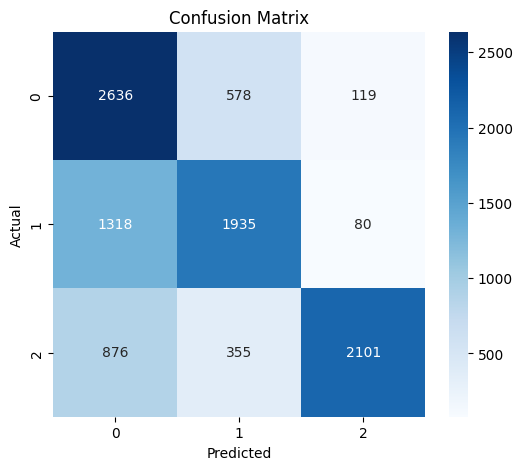

In [18]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None          # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True   # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 2x faster
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # 4bit for 405b

    "unsloth/Llama-3.2-1B-bnb-4bit",           
    "unsloth/Llama-3.2-1B-Instruct-bnb-4bit",
    "unsloth/Llama-3.2-3B-bnb-4bit",
    "unsloth/Llama-3.2-3B-Instruct-bnb-4bit",

    "unsloth/Llama-3.3-70B-Instruct-bnb-4bit" 
] 

decoder, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-1B-bnb-4bit", 
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    fast_inference=False
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)


model = FastLanguageModel.get_peft_model(
    decoder,
    r = 4,              # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0.1,    # Supports any, but = 0 is optimized
    bias = "none",       # Supports any, but = "none" is optimized
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)


model_complete = Llama2Classifier_2(model, 2048, num_classes=3)


params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)
model_name = "unsloth/Llama-3.2-1B-bnb-4bit"
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=5e-2, betas=(0.9, 0.99))

lr = 3e-5
dropout = 0.3
batch_size = 128
model_n = 1

train(
    epochs=10,  
    model=model_complete,
    training_loader=training_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=3,
    model_n=model_n,
    description=f"Exp {model_n}: Modelo: {model_name} - AdamW, lr={lr}, dropout={dropout}, batch_size={batch_size}, modelo={model_name}",
)

#### E [6] - Opción

Óptimo:
- Batch size = 128
- learning_rate: 3e-4
- weight_decay: 5e-2
- betas: **0.9 , 0.95**
- r = 4; lora_alpha = 16: lora_dropout = 0.1

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA RTX 4500 Ada Generation. Num GPUs = 1. Max memory: 23.656 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


/tmp/ipykernel_57/158145151.py:86: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10 | tr_loss: 1.3364, tr_acc: 0.6042, val_loss: 3.0342, val_acc: 0.4361, Prec: 0.3834, Recall: 0.4361, F1-score: 0.3363
Epoch 2/10 | tr_loss: 0.8055, tr_acc: 0.7217, val_loss: 1.2699, val_acc: 0.6001, Prec: 0.7452, Recall: 0.6001, F1-score: 0.5760
Epoch 3/10 | tr_loss: 0.6165, tr_acc: 0.7726, val_loss: 1.1263, val_acc: 0.5988, Prec: 0.7518, Recall: 0.5988, F1-score: 0.5870
Epoch 4/10 | tr_loss: 0.4966, tr_acc: 0.8114, val_loss: 0.9370, val_acc: 0.6477, Prec: 0.7315, Recall: 0.6477, F1-score: 0.6472
Epoch 5/10 | tr_loss: 0.4608, tr_acc: 0.8225, val_loss: 0.8255, val_acc: 0.6787, Prec: 0.7388, Recall: 0.6787, F1-score: 0.6789
Epoch 6/10 | tr_loss: 0.4337, tr_acc: 0.8295, val_loss: 0.7176, val_acc: 0.7317, Prec: 0.7858, Recall: 0.7317, F1-score: 0.7205
Epoch 7/10 | tr_loss: 0.4085, tr_acc: 0.8376, val_loss: 0.7745, val_acc: 0.7000, Prec: 0.7697, Recall: 0.7000, F1-score: 0.6970
Epoch 8/10 | tr_loss: 0.3997, tr_acc: 0.8414, val_loss: 0.7665, val_acc: 0.7047, Prec: 0.7603, Recall: 0

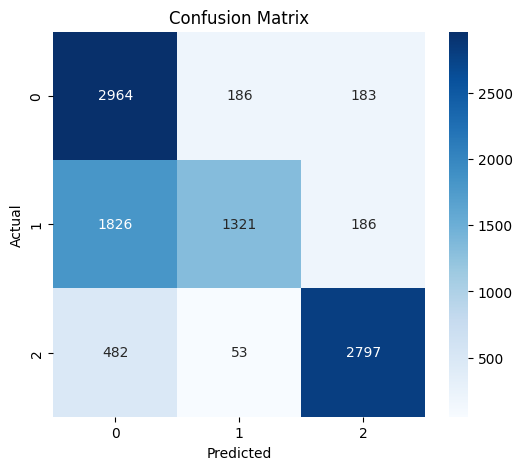

In [21]:
## ultimo bueno ###
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None          # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True   # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 2x faster
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # 4bit for 405b

    "unsloth/Llama-3.2-1B-bnb-4bit",           
    "unsloth/Llama-3.2-1B-Instruct-bnb-4bit",
    "unsloth/Llama-3.2-3B-bnb-4bit",
    "unsloth/Llama-3.2-3B-Instruct-bnb-4bit",

    "unsloth/Llama-3.3-70B-Instruct-bnb-4bit" 
] 

decoder, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-1B-bnb-4bit", 
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    fast_inference=False
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)


model = FastLanguageModel.get_peft_model(
    decoder,
    r = 4,              # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0.1,    # Supports any, but = 0 is optimized
    bias = "none",       # Supports any, but = "none" is optimized
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)


model_complete = Llama2Classifier_2(model, 2048, num_classes=3)


params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)
model_name = "unsloth/Llama-3.2-1B-bnb-4bit"
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=5e-2, betas=(0.9, 0.95))

lr = 3e-5
dropout = 0.3
batch_size = 128
model_n = 1

train(
    epochs=10,  
    model=model_complete,
    training_loader=training_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=3,
    model_n=model_n,
    description=f"Exp {model_n}: Modelo: {model_name} - AdamW, lr={lr}, dropout={dropout}, batch_size={batch_size}, modelo={model_name}",
)

---
#### E [7] - Descartado

Óptimo:
- Batch size = 128
- learning_rate: 3e-4
- **weight_decay: 1e-3**
- betas: 0.7 , 0.75
- r = 4; lora_alpha = 16: lora_dropout = 0.1

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA RTX 4500 Ada Generation. Num GPUs = 1. Max memory: 23.656 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


/tmp/ipykernel_57/158145151.py:86: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10 | tr_loss: 1.3503, tr_acc: 0.5874, val_loss: 2.9742, val_acc: 0.4091, Prec: 0.4040, Recall: 0.4091, F1-score: 0.3004
Epoch 2/10 | tr_loss: 0.7794, tr_acc: 0.7228, val_loss: 1.3008, val_acc: 0.5500, Prec: 0.7001, Recall: 0.5500, F1-score: 0.5316
Epoch 3/10 | tr_loss: 0.5564, tr_acc: 0.7886, val_loss: 0.7447, val_acc: 0.6853, Prec: 0.7025, Recall: 0.6853, F1-score: 0.6909
Epoch 4/10 | tr_loss: 0.5021, tr_acc: 0.8094, val_loss: 1.0015, val_acc: 0.6456, Prec: 0.7706, Recall: 0.6456, F1-score: 0.6379
Epoch 5/10 | tr_loss: 0.4767, tr_acc: 0.8174, val_loss: 0.8427, val_acc: 0.6773, Prec: 0.7459, Recall: 0.6773, F1-score: 0.6756
Epoch 6/10 | tr_loss: 0.4344, tr_acc: 0.8288, val_loss: 1.0280, val_acc: 0.6404, Prec: 0.7784, Recall: 0.6404, F1-score: 0.6301
Early stopping triggered after 6 epochs. No improvement in validation loss for 3 consecutive epochs.
Total training time: 14.77 min
Test Accuracy: 0.6673, Precision: 0.6861, Recall: 0.6673, F1-score: 0.6730


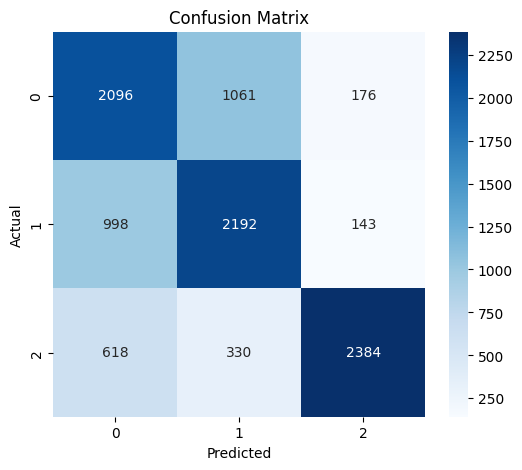

In [17]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None          # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True   # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 2x faster
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # 4bit for 405b

    "unsloth/Llama-3.2-1B-bnb-4bit",           
    "unsloth/Llama-3.2-1B-Instruct-bnb-4bit",
    "unsloth/Llama-3.2-3B-bnb-4bit",
    "unsloth/Llama-3.2-3B-Instruct-bnb-4bit",

    "unsloth/Llama-3.3-70B-Instruct-bnb-4bit" 
] 

decoder, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-1B-bnb-4bit", 
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    fast_inference=False
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)


model = FastLanguageModel.get_peft_model(
    decoder,
    r = 4,              # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0.1,    # Supports any, but = 0 is optimized
    bias = "none",       # Supports any, but = "none" is optimized
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)


model_complete = Llama2Classifier_2(model, 2048, num_classes=3)


params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)
model_name = "unsloth/Llama-3.2-1B-bnb-4bit"
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-3, betas=(0.7, 0.75))

lr = 3e-5
dropout = 0.3
batch_size = 128
model_n = 1

train(
    epochs=10,  
    model=model_complete,
    training_loader=training_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=3,
    model_n=model_n,
    description=f"Exp {model_n}: Modelo: {model_name} - AdamW, lr={lr}, dropout={dropout}, batch_size={batch_size}, modelo={model_name}",
)

#### E [8] - Descartado

Óptimo:
- Batch size = 128
- learning_rate: 3e-4
- **weight_decay: 1e-4**
- betas: 0.7 , 0.75
- r = 4; lora_alpha = 16: lora_dropout = 0.1

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA RTX 4500 Ada Generation. Num GPUs = 1. Max memory: 23.656 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


/tmp/ipykernel_57/158145151.py:86: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10 | tr_loss: 1.3502, tr_acc: 0.5863, val_loss: 2.2650, val_acc: 0.4510, Prec: 0.3199, Recall: 0.4510, F1-score: 0.3564
Epoch 2/10 | tr_loss: 0.7857, tr_acc: 0.7230, val_loss: 1.3269, val_acc: 0.5466, Prec: 0.6487, Recall: 0.5466, F1-score: 0.5279
Epoch 3/10 | tr_loss: 0.5848, tr_acc: 0.7843, val_loss: 0.7153, val_acc: 0.6975, Prec: 0.7145, Recall: 0.6975, F1-score: 0.7025
Epoch 4/10 | tr_loss: 0.4966, tr_acc: 0.8109, val_loss: 1.3656, val_acc: 0.5497, Prec: 0.7531, Recall: 0.5497, F1-score: 0.5277
Epoch 5/10 | tr_loss: 0.4742, tr_acc: 0.8167, val_loss: 0.9170, val_acc: 0.6687, Prec: 0.7219, Recall: 0.6687, F1-score: 0.6718
Epoch 6/10 | tr_loss: 0.4352, tr_acc: 0.8290, val_loss: 1.0779, val_acc: 0.6354, Prec: 0.7814, Recall: 0.6354, F1-score: 0.6227
Early stopping triggered after 6 epochs. No improvement in validation loss for 3 consecutive epochs.
Total training time: 14.73 min
Test Accuracy: 0.6709, Precision: 0.6907, Recall: 0.6709, F1-score: 0.6764


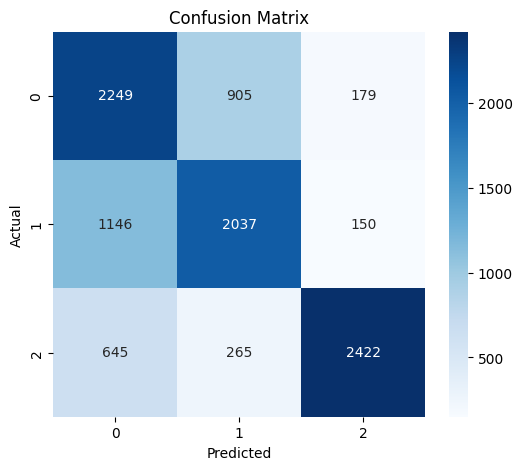

In [26]:
### es el de arriba pero con weight decay a 1e-4
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None          # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True   # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 2x faster
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # 4bit for 405b

    "unsloth/Llama-3.2-1B-bnb-4bit",           
    "unsloth/Llama-3.2-1B-Instruct-bnb-4bit",
    "unsloth/Llama-3.2-3B-bnb-4bit",
    "unsloth/Llama-3.2-3B-Instruct-bnb-4bit",

    "unsloth/Llama-3.3-70B-Instruct-bnb-4bit" 
] 

decoder, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-1B-bnb-4bit", 
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    fast_inference=False
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)


model = FastLanguageModel.get_peft_model(
    decoder,
    r = 4,              # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0.1,    # Supports any, but = 0 is optimized
    bias = "none",       # Supports any, but = "none" is optimized
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)


model_complete = Llama2Classifier_2(model, 2048, num_classes=3)


params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)
model_name = "unsloth/Llama-3.2-1B-bnb-4bit"
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4, betas=(0.7, 0.75))

lr = 3e-5
dropout = 0.3
batch_size = 128
model_n = 1

train(
    epochs=10,  
    model=model_complete,
    training_loader=training_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=3,
    model_n=model_n,
    description=f"Exp {model_n}: Modelo: {model_name} - AdamW, lr={lr}, dropout={dropout}, batch_size={batch_size}, modelo={model_name}",
)

#### E [9] - Descartado

Óptimo:
- Batch size = 128
- learning_rate: 3e-4
- **weight_decay: 5e-3**
- **betas: 0.3 , 0.35**
- r = 4; lora_alpha = 16: lora_dropout = 0.1

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA RTX 4500 Ada Generation. Num GPUs = 1. Max memory: 23.656 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: Dropout = 0 is supported for fast patching. You are using dropout = 0.1.
Unsloth will patch all other layers, except LoRA matrices, causing a performance hit.
Unsloth 2025.3.19 patched 16 layers with 0 QKV layers, 0 O layers and 0 MLP layers.
/tmp/ipykernel_1268/158145151.py:86: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Unsloth: Will smartly offload gradients to save VRAM!


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10 | tr_loss: 1.4451, tr_acc: 0.5774, val_loss: 3.5200, val_acc: 0.4454, Prec: 0.3629, Recall: 0.4454, F1-score: 0.3497
Epoch 2/10 | tr_loss: 0.8799, tr_acc: 0.7025, val_loss: 0.9168, val_acc: 0.6286, Prec: 0.6781, Recall: 0.6286, F1-score: 0.6319
Epoch 3/10 | tr_loss: 0.5857, tr_acc: 0.7758, val_loss: 0.7123, val_acc: 0.7012, Prec: 0.7123, Recall: 0.7012, F1-score: 0.7047
Epoch 4/10 | tr_loss: 0.5181, tr_acc: 0.8031, val_loss: 0.8467, val_acc: 0.7084, Prec: 0.7695, Recall: 0.7084, F1-score: 0.6994
Epoch 5/10 | tr_loss: 0.4844, tr_acc: 0.8126, val_loss: 0.8781, val_acc: 0.6892, Prec: 0.7766, Recall: 0.6892, F1-score: 0.6783
Epoch 6/10 | tr_loss: 0.4401, tr_acc: 0.8272, val_loss: 0.8282, val_acc: 0.6917, Prec: 0.7757, Recall: 0.6917, F1-score: 0.6847
Early stopping triggered after 6 epochs. No improvement in validation loss for 3 consecutive epochs.
Total training time: 15.24 min
Test Accuracy: 0.6820, Precision: 0.6932, Recall: 0.6820, F1-score: 0.6860


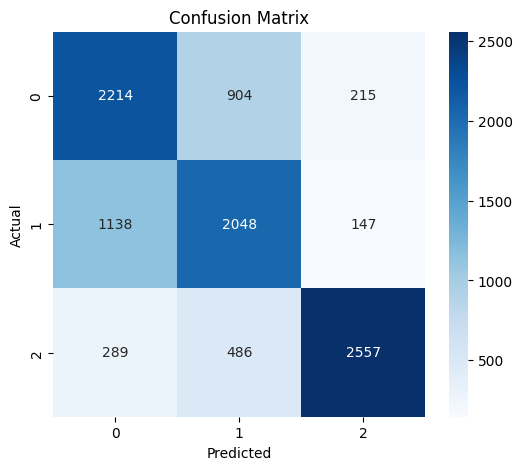

In [16]:
## ultimo bueno ###
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None          # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True   # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 2x faster
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # 4bit for 405b

    "unsloth/Llama-3.2-1B-bnb-4bit",           
    "unsloth/Llama-3.2-1B-Instruct-bnb-4bit",
    "unsloth/Llama-3.2-3B-bnb-4bit",
    "unsloth/Llama-3.2-3B-Instruct-bnb-4bit",

    "unsloth/Llama-3.3-70B-Instruct-bnb-4bit" 
] 

decoder, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-1B-bnb-4bit", 
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    fast_inference=False
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)


model = FastLanguageModel.get_peft_model(
    decoder,
    r = 4,              # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0.1,    # Supports any, but = 0 is optimized
    bias = "none",       # Supports any, but = "none" is optimized
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)


model_complete = Llama2Classifier_2(model, 2048, num_classes=3)


params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)
model_name = "unsloth/Llama-3.2-1B-bnb-4bit"
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=5e-3, betas=(0.3, 0.35))

lr = 3e-5
dropout = 0.3
batch_size = 128
model_n = 1

train(
    epochs=10,  
    model=model_complete,
    training_loader=training_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=3,
    model_n=model_n,
    description=f"Exp {model_n}: Modelo: {model_name} - AdamW, lr={lr}, dropout={dropout}, batch_size={batch_size}, modelo={model_name}",
)

---
#### E [10] - Opción

Óptimo:
- Batch size = 128
- learning_rate: 3e-4
- **weight_decay: 7e-2**
- **betas: 0.9 , 0.95**
- r = 4; lora_alpha = 16: lora_dropout = 0.1

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA RTX 4500 Ada Generation. Num GPUs = 1. Max memory: 23.656 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


/tmp/ipykernel_1268/158145151.py:86: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10 | tr_loss: 1.3311, tr_acc: 0.5957, val_loss: 3.6337, val_acc: 0.4433, Prec: 0.3713, Recall: 0.4433, F1-score: 0.3454
Epoch 2/10 | tr_loss: 0.8572, tr_acc: 0.7157, val_loss: 1.3013, val_acc: 0.5421, Prec: 0.7084, Recall: 0.5421, F1-score: 0.5166
Epoch 3/10 | tr_loss: 0.6012, tr_acc: 0.7798, val_loss: 1.0423, val_acc: 0.6115, Prec: 0.7488, Recall: 0.6115, F1-score: 0.6022
Epoch 4/10 | tr_loss: 0.5020, tr_acc: 0.8090, val_loss: 1.1042, val_acc: 0.6417, Prec: 0.7655, Recall: 0.6417, F1-score: 0.6345
Epoch 5/10 | tr_loss: 0.4642, tr_acc: 0.8207, val_loss: 0.7789, val_acc: 0.7055, Prec: 0.7685, Recall: 0.7055, F1-score: 0.6983
Epoch 6/10 | tr_loss: 0.4273, tr_acc: 0.8319, val_loss: 0.7076, val_acc: 0.7321, Prec: 0.7782, Recall: 0.7321, F1-score: 0.7242
Epoch 7/10 | tr_loss: 0.4091, tr_acc: 0.8384, val_loss: 0.7687, val_acc: 0.7035, Prec: 0.7698, Recall: 0.7035, F1-score: 0.7003
Epoch 8/10 | tr_loss: 0.3950, tr_acc: 0.8437, val_loss: 0.8054, val_acc: 0.6868, Prec: 0.7598, Recall: 0

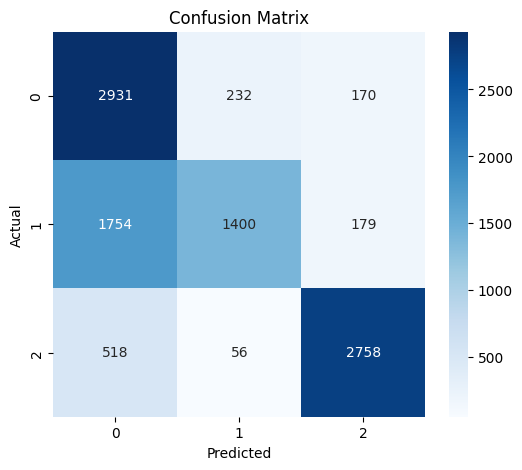

In [18]:
## ultimo bueno ###
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None          # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True   # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 2x faster
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # 4bit for 405b

    "unsloth/Llama-3.2-1B-bnb-4bit",           
    "unsloth/Llama-3.2-1B-Instruct-bnb-4bit",
    "unsloth/Llama-3.2-3B-bnb-4bit",
    "unsloth/Llama-3.2-3B-Instruct-bnb-4bit",

    "unsloth/Llama-3.3-70B-Instruct-bnb-4bit" 
] 

decoder, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-1B-bnb-4bit", 
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    fast_inference=False
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)


model = FastLanguageModel.get_peft_model(
    decoder,
    r = 4,              # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0.1,    # Supports any, but = 0 is optimized
    bias = "none",       # Supports any, but = "none" is optimized
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)


model_complete = Llama2Classifier_2(model, 2048, num_classes=3)


params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)
model_name = "unsloth/Llama-3.2-1B-bnb-4bit"
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=7e-2, betas=(0.9, 0.95))

lr = 3e-5
dropout = 0.3
batch_size = 128
model_n = 1

train(
    epochs=10,  
    model=model_complete,
    training_loader=training_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=3,
    model_n=model_n,
    description=f"Exp {model_n}: Modelo: {model_name} - AdamW, lr={lr}, dropout={dropout}, batch_size={batch_size}, modelo={model_name}",
)

---
#### E [11] - Opción

Óptimo:
- Batch size = 128
- learning_rate: 3e-4
- weight_decay: 7e-2
- betas: 0.9 , 0.95
- r = 4; lora_alpha = 16: lora_dropout = 0.1
- lora_only y rslora

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA RTX 4500 Ada Generation. Num GPUs = 6. Max memory: 23.656 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: bias = `none` is supported for fast patching. You are using bias = lora_only.
Unsloth will patch all other layers, except LoRA matrices, causing a performance hit.
/tmp/ipykernel_2242/158145151.py:86: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Unsloth: Will smartly offload gradients to save VRAM!
Epoch 1/10 | tr_loss: 1.3722, tr_acc: 0.6086, val_loss: 1.5520, val_acc: 0.4992, Prec: 0.7242, Recall: 0.4992, F1-score: 0.4578
Epoch 2/10 | tr_loss: 0.6693, tr_acc: 0.7616, val_loss: 1.1115, val_acc: 0.5779, Prec: 0.7258, Recall: 0.5779, F1-score: 0.5658
Epoch 3/10 | tr_loss: 0.5320, tr_acc: 0.7957, val_loss: 1.0404, val_acc: 0.6001, Prec: 0.7585, Recall: 0.6001, F1-score: 0.5894
Epoch 4/10 | tr_loss: 0.4816, tr_acc: 0.8163, val_loss: 1.0025, val_acc: 0.6219, Prec: 0.7832, Recall: 0.6219, F1-score: 0.6081
Epoch 5/10 | tr_loss: 0.4433, tr_acc: 0.8284, val_loss: 1.1573, val_acc: 0.6042, Prec: 0.7466, Recall: 0.6042, F1-score: 0.5948
Epoch 6/10 | tr_loss: 0.4098, tr_acc: 0.8384, val_loss: 0.6830, val_acc: 0.7241, Prec: 0.7805, Recall: 0.7241, F1-score: 0.7175
Epoch 7/10 | tr_loss: 0.3849, tr_acc: 0.8463, val_loss: 0.7888, val_acc: 0.6945, Prec: 0.7740, Recall: 0.6945, F1-score: 0.6910
Epoch 8/10 | tr_loss: 0.3740, tr_acc: 0.8503, val_

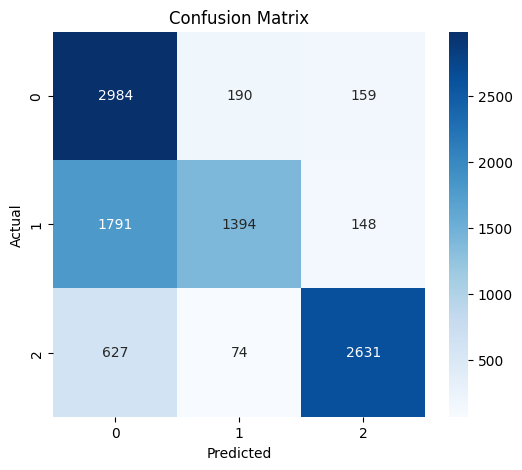

In [17]:
## ultimo bueno ###
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None          # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True   # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 2x faster
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # 4bit for 405b

    "unsloth/Llama-3.2-1B-bnb-4bit",           
    "unsloth/Llama-3.2-1B-Instruct-bnb-4bit",
    "unsloth/Llama-3.2-3B-bnb-4bit",
    "unsloth/Llama-3.2-3B-Instruct-bnb-4bit",

    "unsloth/Llama-3.3-70B-Instruct-bnb-4bit" 
] 

decoder, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-1B-bnb-4bit", 
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    fast_inference=False
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)


model = FastLanguageModel.get_peft_model(
    decoder,
    r = 4,              # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0.1,    # Supports any, but = 0 is optimized
    bias = "lora_only",       # Supports any, but = "none" is optimized
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = True,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)


model_complete = Llama2Classifier_2(model, 2048, num_classes=3)


params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)
model_name = "unsloth/Llama-3.2-1B-bnb-4bit"
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=7e-2, betas=(0.9, 0.95))

lr = 3e-5
dropout = 0.3
batch_size = 128
model_n = 1

train(
    epochs=10,  
    model=model_complete,
    training_loader=training_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=3,
    model_n=model_n,
    description=f"Exp {model_n}: Modelo: {model_name} - AdamW, lr={lr}, dropout={dropout}, batch_size={batch_size}, modelo={model_name}",
)

#### E [12] balanceado partiendo del [11] - Descartado

Óptimo:
- Batch size = 128
- learning_rate: 3e-4
- weight_decay: 7e-2
- **betas: 0.9 , 0.99**
- r = 4; lora_alpha = 16: lora_dropout = 0.1

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA RTX 4500 Ada Generation. Num GPUs = 1. Max memory: 23.656 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


/tmp/ipykernel_3382/158145151.py:86: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10 | tr_loss: 1.2257, tr_acc: 0.5961, val_loss: 2.6900, val_acc: 0.4196, Prec: 0.4087, Recall: 0.4196, F1-score: 0.3148
Epoch 2/10 | tr_loss: 0.8795, tr_acc: 0.6697, val_loss: 1.3267, val_acc: 0.4539, Prec: 0.7082, Recall: 0.4539, F1-score: 0.3638
Epoch 3/10 | tr_loss: 0.6710, tr_acc: 0.7370, val_loss: 1.0981, val_acc: 0.5577, Prec: 0.7321, Recall: 0.5577, F1-score: 0.5383
Epoch 4/10 | tr_loss: 0.5664, tr_acc: 0.7772, val_loss: 1.2824, val_acc: 0.5155, Prec: 0.7064, Recall: 0.5155, F1-score: 0.4722
Epoch 5/10 | tr_loss: 0.5211, tr_acc: 0.7998, val_loss: 0.9570, val_acc: 0.6070, Prec: 0.7464, Recall: 0.6070, F1-score: 0.5984
Epoch 6/10 | tr_loss: 0.4985, tr_acc: 0.8117, val_loss: 0.8261, val_acc: 0.6837, Prec: 0.7577, Recall: 0.6837, F1-score: 0.6805
Epoch 7/10 | tr_loss: 0.4721, tr_acc: 0.8228, val_loss: 0.8406, val_acc: 0.6630, Prec: 0.7434, Recall: 0.6630, F1-score: 0.6618
Epoch 8/10 | tr_loss: 0.4637, tr_acc: 0.8243, val_loss: 0.8572, val_acc: 0.6413, Prec: 0.7318, Recall: 0

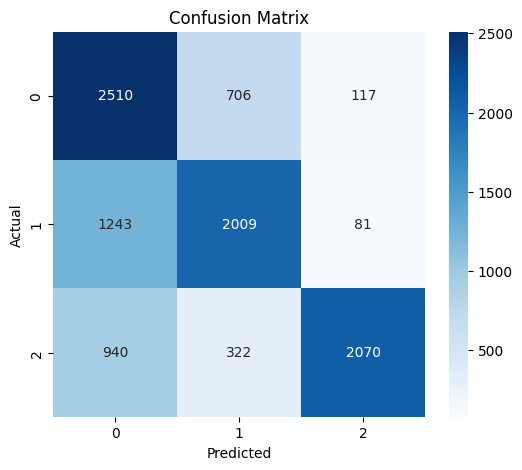

In [16]:
## ultimo bueno ###
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None          # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True   # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 2x faster
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # 4bit for 405b

    "unsloth/Llama-3.2-1B-bnb-4bit",           
    "unsloth/Llama-3.2-1B-Instruct-bnb-4bit",
    "unsloth/Llama-3.2-3B-bnb-4bit",
    "unsloth/Llama-3.2-3B-Instruct-bnb-4bit",

    "unsloth/Llama-3.3-70B-Instruct-bnb-4bit" 
] 

decoder, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Llama-3.2-1B-bnb-4bit", 
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    fast_inference=False
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)


model = FastLanguageModel.get_peft_model(
    decoder,
    r = 4,              # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0.1,    # Supports any, but = 0 is optimized
    bias = "none",       # Supports any, but = "none" is optimized
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)


model_complete = Llama2Classifier_2(model, 2048, num_classes=3)


params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}

class_counts = df_train['label'].value_counts().sort_index()  # Asegúrate que los índices estén en orden
total = class_counts.sum()
class_weights = total / (len(class_counts) * class_counts)
class_weights_tensor = torch.tensor(class_weights.values, dtype=torch.float).to(device)

loss = nn.CrossEntropyLoss(weight=class_weights_tensor)
def loss_fn(outputs, targets):
    targets = targets.long()
    return loss(outputs.float(), targets)  # Fuerza a float32
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)
model_name = "unsloth/Llama-3.2-1B-bnb-4bit"
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=7e-2, betas=(0.9, 0.95))

lr = 3e-5
dropout = 0.3
batch_size = 128
model_n = 1

train(
    epochs=10,  
    model=model_complete,
    training_loader=training_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=3,
    model_n=model_n,
    description=f"Exp {model_n}: Modelo: {model_name} - AdamW, lr={lr}, dropout={dropout}, batch_size={batch_size}, modelo={model_name}",
)

### ⚡ **Experimentos con varios modelos de la familia Llama-2 con LoRA**

*Se prueban modelos 1B, 3B, 8B...* con LoRA

Papers:
1. QLoRA: Efficient Finetuning of Quantized LLMs: https://arxiv.org/abs/2305.14314
2. LoRA: Low-Rank Adaptation of Large Language Models: https://arxiv.org/abs/2106.09685

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Llama2Classifier_2(nn.Module):
    def __init__(self, decoder, size_llm, num_classes=3):
        super(Llama2Classifier_2, self).__init__()

        self.size_encoder_embds = 384  
        self.size_llm_embds = size_llm 
        self.num_classes = num_classes 
        self.decoder = decoder
        self.decoder = self.decoder.to(device)

        self.linear_projection = nn.Linear(self.size_encoder_embds, self.size_llm_embds).to(dtype=self.decoder.dtype, device=self.decoder.device)

        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(self.size_llm_embds, self.num_classes).to(dtype=self.decoder.dtype, device=self.decoder.device)
        
        
    def forward(self, inputs_embeds, attention_mask):
        batch_size = inputs_embeds.size(0)
        encoder_embeds = [] 

        encoder_embeds = inputs_embeds 
        
        encoder_embeds = encoder_embeds.to(dtype=self.linear_projection.weight.dtype)
    
        projected_embeds = self.linear_projection(encoder_embeds) 
        
        projected_embeds = projected_embeds.to(dtype=self.decoder.dtype)
        attention_mask = attention_mask.to(device).to(self.decoder.dtype)
        
        decoder_output = self.decoder(
            inputs_embeds=projected_embeds,
            attention_mask=attention_mask,
            output_hidden_states=True
        )
        
        hidden_states = decoder_output.hidden_states  
        last_hidden_state = hidden_states[-1] 

        aggregated_output = torch.sum(last_hidden_state, dim=1)  
        aggregated_output = aggregated_output.to(device).to(self.decoder.dtype)

        logits = self.classifier(aggregated_output.to(self.classifier.weight.dtype))
        
        return logits 

loss = torch.nn.CrossEntropyLoss()

def loss_fn(outputs, targets):
    targets = targets.long()  
    return loss(outputs, targets)

In [14]:
import numpy as np
from torch.cuda.amp import autocast, GradScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
import torch
from unsloth import FastLanguageModel
from peft import get_peft_model_state_dict


''' -------------------------------------------------------------------------------- '''    
def model_builder(decoder_name, emb_size, lr, r, lora_alpha, lora_dropout, weight_decay, betas):

    max_seq_length = emb_size 
    dtype = None         
    load_in_4bit = True   

    decoder, tokenizer = FastLanguageModel.from_pretrained(
        model_name = decoder_name, 
        max_seq_length = max_seq_length,
        dtype = dtype,
        load_in_4bit = load_in_4bit,
        fast_inference=False
    )


    model = FastLanguageModel.get_peft_model(
        decoder,
        r = r,              
        target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                          "gate_proj", "up_proj", "down_proj",],
        lora_alpha = lora_alpha,
        lora_dropout = lora_dropout,   
        bias = "none",      
        use_gradient_checkpointing = "unsloth", 
        use_rslora = False,  
        loftq_config = None, 
    )


    model_complete = Llama2Classifier_2(model, emb_size, num_classes=3)
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay, betas=betas)
    return model_complete, optimizer


''' -------------------------------------------------------------------------------- '''    
def run_experiments(tokenizer, n_experiments, model_builder, decoder_name, llm_name, emb_size, model_n_start, description_base,
                    training_loader, val_loader, test_loader, learning_rate, batch_size, dropout, patience, experiment,
                    r, lora_alpha, lora_dropout, weight_decay, betas):
    all_metrics = {
        "accuracy": [],
        "precision": [],
        "recall": [],
        "f1_score": [],
        "time_train": []
    }

    experiment_results = []  # Lista para los resultados de cada experimento
    
    model_experiments = []  # Lista para almacenar los mejores modelos de cada experimento

    best_model = None
    best_f1_score = -float('inf')  # Mejor pérdida de validación
    best_model_path = ""

    for i in range(n_experiments):
        print(f"\n\n[*** Experimento {i+1}/{n_experiments}] -----------------------------")
        
        model_n = model_n_start + i
        description = f"{description_base} | Run {i+1}/{n_experiments}"
        
        ### Datos
        params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
        training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)
        
        model, optimizer = model_builder(decoder_name, emb_size, learning_rate, r, lora_alpha, lora_dropout, weight_decay, betas)
        
        # Entrenamiento del modelo
        hyperparams, metrics, test_metrics, cm, best_epoch, total_duration, path = train(
                                                                                    epochs=7, 
                                                                                    model=model,
                                                                                    training_loader=training_loader,
                                                                                    val_loader=val_loader,
                                                                                    optimizer=optimizer,
                                                                                    learning_rate=learning_rate,
                                                                                    batch_size=batch_size,
                                                                                    dropout=dropout,
                                                                                    r = r,
                                                                                    lora_alpha = lora_alpha,
                                                                                    lora_dropout = lora_dropout,
                                                                                    patience=patience,
                                                                                    model_n=model_n,
                                                                                    description=description,
                                                                                    experiment=experiment,
                                                                                )

        model_experiments.append(path)
        test = test_metrics  # Asumimos que test_metrics es un diccionario con las métricas de test

        all_metrics["accuracy"].append(test["accuracy"])
        all_metrics["precision"].append(test["precision"])
        all_metrics["recall"].append(test["recall"])
        all_metrics["f1_score"].append(test["f1_score"])
        all_metrics["time_train"].append(total_duration)

        f1_score = test["f1_score"]

        if f1_score > best_f1_score:  # Si el modelo actual tiene mejor F1-score
            best_f1_score = f1_score
            best_model = model
            best_model_path = f"./Models/exp({experiment})_LoRA_best_model_{model_n}.pth"  # Ruta para este modelo
            best_experiment = {
                "id": model_n,
                "description": description,
                "hyperparameters": hyperparams,
                "metrics": metrics,
                "test_metrics": test_metrics,
                "confusion_matrix": cm.tolist(),
                "best_epoch": best_epoch,
                "time_train": total_duration
            }

    # Eliminacion de los n - 1 modelos peores respecto al mejor
    for path in model_experiments:
        if path != best_model_path:
            try:
                os.remove(path)
                print(f"Modelo eliminado: {path}")
            except FileNotFoundError:
                print(f"[Aviso] No se encontró el archivo para eliminar: {path}")

    
    print(f"\n --- Evaluación del mejor modelo: {best_model_path}")
    print(f"Test Accuracy:  {best_experiment['test_metrics']['accuracy']:.4f}")
    print(f"Test Precision: {best_experiment['test_metrics']['precision']:.4f}")
    print(f"Test Recall:    {best_experiment['test_metrics']['recall']:.4f}")
    print(f"Test F1-score:  {best_experiment['test_metrics']['f1_score']:.4f}")

    print(f"\n --- Matriz de confusión del mejor modelo: ")
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    
    
    # Métricas agregadas
    print("\n[*** Resultados Finales]")
    for metric in all_metrics:
        values = np.array(all_metrics[metric])
        print(f"{metric.capitalize()}: Media = {values.mean():.4f} | Std = {values.std():.4f}")

    # Guardado de todos los experimentos en un archivo JSON
    experiment_data = {
        "id_experiment": f"experiment_{experiment}",  # ID único para el experimento grande
        "llm_name": llm_name,
        "best_experiment": best_experiment,
        "aggregated_metrics": {
            "accuracy_mean": np.mean(all_metrics["accuracy"]),
            "accuracy_std": np.std(all_metrics["accuracy"]),
            "precision_mean": np.mean(all_metrics["precision"]),
            "precision_std": np.std(all_metrics["precision"]),
            "recall_mean": np.mean(all_metrics["recall"]),
            "recall_std": np.std(all_metrics["recall"]),
            "f1_score_mean": np.mean(all_metrics["f1_score"]),
            "f1_score_std": np.std(all_metrics["f1_score"]),
            "time_train_mean": np.mean(all_metrics["time_train"]),
            "time_train_std": np.std(all_metrics["time_train"])
        },
        "best_model_path": best_model_path  # Lista con los mejores modelos de cada experimento
    }

    try:
        with open("./diverse_llama2_LoRA.json", "r") as f:
            all_experiments = json.load(f)
    except (FileNotFoundError, json.JSONDecodeError):
        all_experiments = []

    all_experiments.append(experiment_data)

    with open("./diverse_llama2_LoRA.json", "w") as f:
        json.dump(all_experiments, f, indent=4)




''' -------------------------------------------------------------------------------- '''
def evaluate_test(model, test_loader, best_model_path, show_cm=None):
    
    checkpoint = torch.load(best_model_path, map_location=device)
    model.decoder.load_state_dict(checkpoint["lora"], strict=False)
    model.linear_projection.load_state_dict(checkpoint["projection"])
    model.classifier.load_state_dict(checkpoint["classifier"])
        
    model.eval()
    
    all_preds, all_labels = [], []
    all_labels = []
    with torch.no_grad():
        for data in test_loader:
            inputs_embeds = data['inputs_embeds'].to(device)
            attention_mask = data['attention_mask'].to(device).to(torch.float32)
            labels = data['labels'].to(device).long()
            
            logits = model(inputs_embeds, attention_mask)
            preds = torch.argmax(logits, dim=1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    acc = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
    test_metrics = {"accuracy": acc, "precision": precision, "recall": recall, "f1_score": f1}

    cm = confusion_matrix(all_labels, all_preds)
    
    print(f"Test Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    
    if show_cm:
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

    return test_metrics, cm


''' -------------------------------------------------------------------------------- '''
def train(epochs, model, training_loader, val_loader, optimizer, learning_rate, batch_size, dropout, r, lora_alpha, lora_dropout, patience=3, model_n=0, description="", experiment=""):
    model.train()
    model.to(device)  
    
    batches = len(training_loader)
    scaler = GradScaler()
    
    metrics = {"train": [], "val": []}
    total_start_time = time.time()
    best_f1_score = 0.0
    best_model_path = f"./Models/exp({experiment})_LoRA_best_model_{model_n}.pth"
    no_improve_epochs = 0
        
    for epoch in range(epochs):
        total_loss = 0
        total_correct = 0
        total_samples = 0
        epoch_start_time = time.time()

        for i, data in enumerate(training_loader, 0):
            inputs_embeds = data['inputs_embeds'].to(device).to(model.decoder.dtype)
            attention_mask = data['attention_mask'].to(device).to(model.decoder.dtype)
            labels = data['labels'].to(device).long()
    
            optimizer.zero_grad()
    
            logits = model(inputs_embeds, attention_mask)
            loss = loss_fn(logits, labels)
    
            scaler.scale(loss).backward()
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            scaler.step(optimizer) 
            scaler.update()
            
            total_loss += loss.item()
            preds = torch.argmax(logits, dim=1)
            total_correct += (preds == labels).sum().item()
            total_samples += labels.size(0)
        
        train_loss = total_loss / batches
        train_acc = total_correct / total_samples
        
        model.eval()
        val_loss, all_preds, all_labels = 0, [], []
        with torch.no_grad():
            for data in val_loader:
                inputs_embeds = data['inputs_embeds'].to(device).to(model.decoder.dtype)
                attention_mask = data['attention_mask'].to(device).to(model.decoder.dtype)
                labels = data['labels'].to(device).long()
                
                logits = model(inputs_embeds, attention_mask)
                loss = loss_fn(logits, labels)
                val_loss += loss.item()
                preds = torch.argmax(logits, dim=1)
                
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        val_loss /= len(val_loader)
        acc = accuracy_score(all_labels, all_preds)
        precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')

        model.train()
        
        epoch_duration = (time.time() - epoch_start_time) / 60
        print(f"Epoch {epoch+1}/{epochs} | tr_loss: {train_loss:.4f}, tr_acc: {train_acc:.4f}, val_loss: {val_loss:.4f}, val_acc: {acc:.4f}, Prec: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

        metrics["train"].append({"epoch": epoch+1, "loss": train_loss, "accuracy": train_acc})
        metrics["val"].append({"epoch": epoch+1, "loss": val_loss, "accuracy": acc, "precision": precision, "recall": recall, "f1_score": f1})
        
        if f1 > best_f1_score:
            best_f1_score = f1
            best_epoch = epoch + 1
            torch.save({
                "lora": model.decoder.state_dict(),
                "classifier": model.classifier.state_dict(),
                "projection": model.linear_projection.state_dict(),
            }, best_model_path)
            no_improve_epochs = 0
        else:
            no_improve_epochs += 1
        
        if no_improve_epochs >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs.")
            break
    
    total_duration = (time.time() - total_start_time) / 60  
    print(f"Total training time: {total_duration:.2f} min")
    
    test_metrics, cm = evaluate_test(model, test_loader, best_model_path, show_cm=False)
    hyperparams = {
        "epochs": epochs,
        "optimizer": str(optimizer),
        "learning_rate": learning_rate,
        "batch_size": batch_size,
        "dropout": dropout,
        "patience": patience,
        "r": r,
        "lora_alpha": lora_alpha,
        "lora_dropout": lora_dropout
    }

    return hyperparams, metrics, test_metrics, cm, best_epoch, total_duration, best_model_path


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


#### 0. **Modelo Llama2-1B-bnb-4bit**
*n_experiments = 1 porque el LoRA congela la mayoría de los pesos del modelo, los resultados son deterministas.*
> Recordatorio: se almacena el modelo en dos archivos, uno para los nuevos pesos del LoRA, un segundo para los pesos de las capas lineales restantes.


🔄 Cargando modelo: unsloth/Llama-3.2-1B-bnb-4bit


[*** Experimento 1/1] -----------------------------
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA A40. Num GPUs = 1. Max memory: 44.352 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.6. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/15 | tr_loss: 1.3008, tr_acc: 0.5954, val_loss: 3.2678, val_acc: 0.4279, Prec: 0.3973, Recall: 0.4279, F1-score: 0.3264
Epoch 2/15 | tr_loss: 0.8454, tr_acc: 0.7122, val_loss: 1.0077, val_acc: 0.6199, Prec: 0.7351, Recall: 0.6199, F1-score: 0.6097
Epoch 3/15 | tr_loss: 0.5956, tr_acc: 0.7794, val_loss: 1.0864, val_acc: 0.5991, Prec: 0.7279, Recall: 0.5991, F1-score: 0.5920
Epoch 4/15 | tr_loss: 0.5016, tr_acc: 0.8082, val_loss: 0.8107, val_acc: 0.6761, Prec: 0.7434, Recall: 0.6761, F1-score: 0.6735
Epoch 5/15 | tr_loss: 0.4707, tr_acc: 0.8170, val_loss: 0.9179, val_acc: 0.6611, Prec: 0.7766, Recall: 0.6611, F1-score: 0.6524
Epoch 6/15 | tr_loss: 0.4350, tr_acc: 0.8296, val_loss: 0.6993, val_acc: 0.7277, Prec: 0.7833, Recall: 0.7277, F1-score: 0.7188
Epoch 7/15 | tr_loss: 0.4125, tr_acc: 0.8380, val_loss: 0.8139, val_acc: 0.6858, Prec: 0.7557, Recall: 0.6858, F1-score: 0.6843
Epoch 8/15 | tr_loss: 0.3987, tr_acc: 0.8408, val_loss: 0.7482, val_acc: 0.7027, Prec: 0.7615, Recall: 0

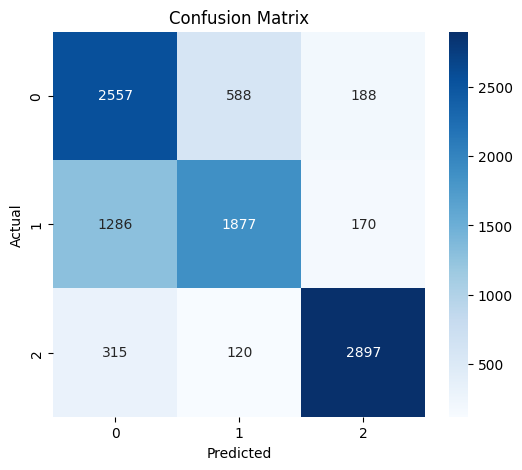


[*** Resultados Finales]
Accuracy: Media = 0.7332 | Std = 0.0000
Precision: Media = 0.7437 | Std = 0.0000
Recall: Media = 0.7332 | Std = 0.0000
F1_score: Media = 0.7322 | Std = 0.0000
Time_train: Media = 39.3639 | Std = 0.0000


In [35]:
import warnings
from transformers import AutoModelForCausalLM, AutoTokenizer
warnings.simplefilter("ignore", category=FutureWarning)

model_name = "unsloth/Llama-3.2-1B-bnb-4bit"
print(f"\n🔄 Cargando modelo: {model_name}")
emb_size = 2048

tokenizer = AutoTokenizer.from_pretrained(model_name)

### Experimento
lr = 3e-4
batch_size = 128
dropout = 0.3
n_experiments = 1


run_experiments(tokenizer=tokenizer,
    n_experiments=n_experiments,
    model_builder=model_builder,
    decoder_name=model_name,
    llm_name=model_name,
    emb_size=emb_size,
    model_n_start=1,
    description_base=f"Estudio de diferentes modelos Llama2 con LoRA. Experimento LoRA. Modelo: {model_name} - AdamW, lr={lr}, batch_size={batch_size}, n_experiments={n_experiments}",
    training_loader=training_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=5,
    experiment="Llama-3.2-1B-bnb-4bit",
    r=4,
    lora_alpha=16,
    lora_dropout=0.1,
)

#### 1. **Modelo Llama2-3B-bnb-4bit**


🔄 Cargando modelo: unsloth/Llama-3.2-3B-bnb-4bit


[*** Experimento 1/1] -----------------------------
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA A40. Num GPUs = 1. Max memory: 44.352 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.6. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/15 | tr_loss: 1.4769, tr_acc: 0.5452, val_loss: 4.5449, val_acc: 0.4434, Prec: 0.3628, Recall: 0.4434, F1-score: 0.3490


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2/15 | tr_loss: 1.7128, tr_acc: 0.6185, val_loss: 6.0257, val_acc: 0.4145, Prec: 0.4178, Recall: 0.4145, F1-score: 0.3083
Epoch 3/15 | tr_loss: 1.0462, tr_acc: 0.6891, val_loss: 0.8549, val_acc: 0.6622, Prec: 0.7271, Recall: 0.6622, F1-score: 0.6613
Epoch 4/15 | tr_loss: 0.5645, tr_acc: 0.7985, val_loss: 0.6168, val_acc: 0.7398, Prec: 0.7639, Recall: 0.7398, F1-score: 0.7310
Epoch 5/15 | tr_loss: 0.4855, tr_acc: 0.8167, val_loss: 0.7316, val_acc: 0.7216, Prec: 0.7814, Recall: 0.7216, F1-score: 0.7087
Epoch 6/15 | tr_loss: 0.4523, tr_acc: 0.8277, val_loss: 0.6061, val_acc: 0.7643, Prec: 0.7726, Recall: 0.7643, F1-score: 0.7579
Epoch 7/15 | tr_loss: 0.4361, tr_acc: 0.8312, val_loss: 0.8354, val_acc: 0.7341, Prec: 0.7959, Recall: 0.7341, F1-score: 0.7176
Epoch 8/15 | tr_loss: 0.4349, tr_acc: 0.8301, val_loss: 0.9404, val_acc: 0.7188, Prec: 0.8001, Recall: 0.7188, F1-score: 0.7011
Epoch 9/15 | tr_loss: 0.4243, tr_acc: 0.8330, val_loss: 0.6253, val_acc: 0.7599, Prec: 0.7969, Recall: 0

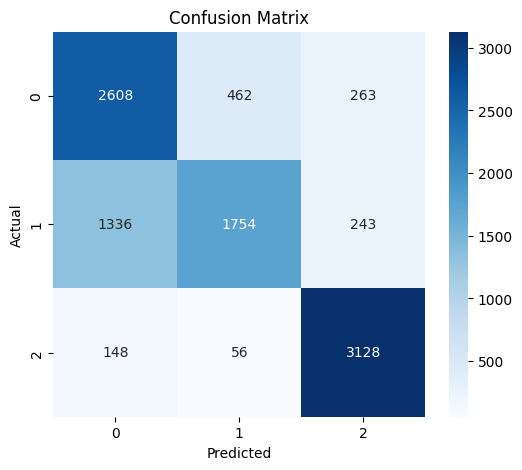


[*** Resultados Finales]
Accuracy: Media = 0.7491 | Std = 0.0000
Precision: Media = 0.7567 | Std = 0.0000
Recall: Media = 0.7491 | Std = 0.0000
F1_score: Media = 0.7421 | Std = 0.0000
Time_train: Media = 48.2576 | Std = 0.0000


In [17]:
import warnings
from transformers import AutoModelForCausalLM, AutoTokenizer
warnings.simplefilter("ignore", category=FutureWarning)

model_name = "unsloth/Llama-3.2-3B-bnb-4bit"
print(f"\n🔄 Cargando modelo: {model_name}")
emb_size = 3072

tokenizer = AutoTokenizer.from_pretrained(model_name)

### Datos
params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)

### Experimento
lr = 3e-4
batch_size = 128
dropout = 0.3
n_experiments = 1


run_experiments(tokenizer=tokenizer,
    n_experiments=n_experiments,
    model_builder=model_builder,
    decoder_name=model_name,
    llm_name=model_name,
    emb_size=emb_size,
    model_n_start=5,
    description_base=f"Estudio de diferentes modelos Llama2 con LoRA. Experimento LoRA. Modelo: {model_name} - AdamW, lr={lr}, batch_size={batch_size}, n_experiments={n_experiments}",
    training_loader=training_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=5,
    experiment="Llama-3.2-3B-bnb-4bit",
    r=8,
    lora_alpha=32,
    lora_dropout=0.2,
    weight_decay=1e-4,
    betas=(0.9, 0.95)
)


🔄 Cargando modelo: unsloth/Llama-3.2-3B-bnb-4bit


[*** Experimento 1/1] -----------------------------
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA A40. Num GPUs = 1. Max memory: 44.352 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.6. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Epoch 1/15 | tr_loss: 1.7435, tr_acc: 0.5616, val_loss: 2.5670, val_acc: 0.4391, Prec: 0.5817, Recall: 0.4391, F1-score: 0.3476


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2/15 | tr_loss: 1.7327, tr_acc: 0.6170, val_loss: 3.9517, val_acc: 0.4458, Prec: 0.3919, Recall: 0.4458, F1-score: 0.3508
Epoch 3/15 | tr_loss: 1.2902, tr_acc: 0.6687, val_loss: 1.5902, val_acc: 0.4587, Prec: 0.6308, Recall: 0.4587, F1-score: 0.3716
Epoch 4/15 | tr_loss: 0.6967, tr_acc: 0.7714, val_loss: 0.9197, val_acc: 0.6608, Prec: 0.7635, Recall: 0.6608, F1-score: 0.6487
Epoch 5/15 | tr_loss: 0.4970, tr_acc: 0.8134, val_loss: 1.0049, val_acc: 0.6086, Prec: 0.7503, Recall: 0.6086, F1-score: 0.5986
Epoch 6/15 | tr_loss: 0.4931, tr_acc: 0.8168, val_loss: 0.6424, val_acc: 0.7456, Prec: 0.8005, Recall: 0.7456, F1-score: 0.7176
Epoch 7/15 | tr_loss: 0.4471, tr_acc: 0.8273, val_loss: 0.5809, val_acc: 0.7470, Prec: 0.8050, Recall: 0.7470, F1-score: 0.7241
Epoch 8/15 | tr_loss: 0.4415, tr_acc: 0.8277, val_loss: 0.9035, val_acc: 0.6988, Prec: 0.7987, Recall: 0.6988, F1-score: 0.6775
Epoch 9/15 | tr_loss: 0.4150, tr_acc: 0.8361, val_loss: 0.6712, val_acc: 0.7224, Prec: 0.7947, Recall: 0

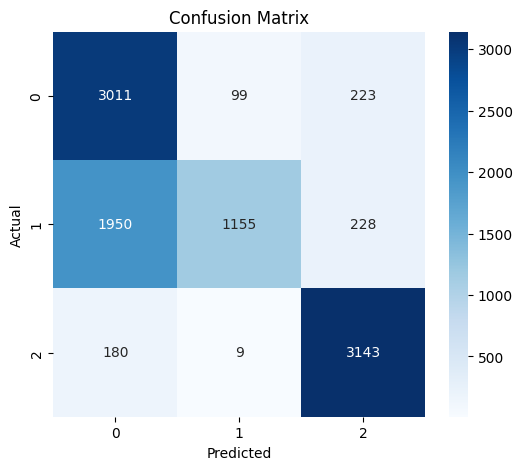


[*** Resultados Finales]
Accuracy: Media = 0.7310 | Std = 0.0000
Precision: Media = 0.7916 | Std = 0.0000
Recall: Media = 0.7310 | Std = 0.0000
F1_score: Media = 0.7069 | Std = 0.0000
Time_train: Media = 53.2139 | Std = 0.0000


In [23]:
import warnings
from transformers import AutoModelForCausalLM, AutoTokenizer
warnings.simplefilter("ignore", category=FutureWarning)

model_name = "unsloth/Llama-3.2-3B-bnb-4bit"
print(f"\n🔄 Cargando modelo: {model_name}")
emb_size = 3072

tokenizer = AutoTokenizer.from_pretrained(model_name)

### Datos
params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)

### Experimento
lr = 3e-4
batch_size = 128
dropout = 0.3
n_experiments = 1


run_experiments(tokenizer=tokenizer,
    n_experiments=n_experiments,
    model_builder=model_builder,
    decoder_name=model_name,
    llm_name=model_name,
    emb_size=emb_size,
    model_n_start=11,
    description_base=f"Estudio de diferentes modelos Llama2 con LoRA. Experimento LoRA. Modelo: {model_name} - AdamW, lr={lr}, batch_size={batch_size}, n_experiments={n_experiments}",
    training_loader=training_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=5,
    experiment="Llama-3.2-3B-bnb-4bit",
    r=8,
    lora_alpha=16,
    lora_dropout=0.2,
    weight_decay=1e-4,
    betas=(0.5, 0.55)
)

#### 2. **Modelo Llama2-7B-bnb-4bit**

# Pruebas 8B

In [ ]:
import numpy as np
from torch.cuda.amp import autocast, GradScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
import torch
from unsloth import FastLanguageModel
from peft import get_peft_model_state_dict


''' -------------------------------------------------------------------------------- '''    
def model_builder(decoder_name, emb_size, lr, r, lora_alpha, lora_dropout, weight_decay, betas):

    max_seq_length = emb_size 
    dtype = None         
    load_in_4bit = True   

    decoder, tokenizer = FastLanguageModel.from_pretrained(
        model_name = decoder_name, 
        max_seq_length = max_seq_length,
        dtype = dtype,
        load_in_4bit = load_in_4bit,
        fast_inference=False
    )


    model = FastLanguageModel.get_peft_model(
        decoder,
        r = r,              
        target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                          "gate_proj", "up_proj", "down_proj",],
        lora_alpha = lora_alpha,
        lora_dropout = lora_dropout,   
        bias = "none",      
        use_gradient_checkpointing = "unsloth", 
        use_rslora = False,  
        loftq_config = None, 
    )


    model_complete = Llama2Classifier_2(model, emb_size, num_classes=3)
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay, betas=betas)
    return model_complete, optimizer


''' -------------------------------------------------------------------------------- '''    
def run_experiments(tokenizer, n_experiments, model_builder, decoder_name, llm_name, emb_size, model_n_start, description_base,
                    training_loader, val_loader, test_loader, learning_rate, batch_size, dropout, patience, experiment,
                    r, lora_alpha, lora_dropout, weight_decay, betas):
    all_metrics = {
        "accuracy": [],
        "precision": [],
        "recall": [],
        "f1_score": [],
        "time_train": []
    }

    experiment_results = []  # Lista para los resultados de cada experimento
    
    model_experiments = []  # Lista para almacenar los mejores modelos de cada experimento

    best_model = None
    best_f1_score = -float('inf')  # Mejor pérdida de validación
    best_model_path = ""

    for i in range(n_experiments):
        print(f"\n\n[*** Experimento {i+1}/{n_experiments}] -----------------------------")
        
        model_n = model_n_start + i
        description = f"{description_base} | Run {i+1}/{n_experiments}"
        
        ### Datos
        params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
        training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)
        
        model, optimizer = model_builder(decoder_name, emb_size, learning_rate, r, lora_alpha, lora_dropout, weight_decay, betas)
        
        # Entrenamiento del modelo
        hyperparams, metrics, test_metrics, cm, best_epoch, total_duration, path = train(
                                                                                    epochs=5, 
                                                                                    model=model,
                                                                                    training_loader=training_loader,
                                                                                    val_loader=val_loader,
                                                                                    optimizer=optimizer,
                                                                                    learning_rate=learning_rate,
                                                                                    batch_size=batch_size,
                                                                                    dropout=dropout,
                                                                                    r = r,
                                                                                    lora_alpha = lora_alpha,
                                                                                    lora_dropout = lora_dropout,
                                                                                    patience=patience,
                                                                                    model_n=model_n,
                                                                                    description=description,
                                                                                    experiment=experiment,
                                                                                )

        model_experiments.append(path)
        test = test_metrics  # Asumimos que test_metrics es un diccionario con las métricas de test

        all_metrics["accuracy"].append(test["accuracy"])
        all_metrics["precision"].append(test["precision"])
        all_metrics["recall"].append(test["recall"])
        all_metrics["f1_score"].append(test["f1_score"])
        all_metrics["time_train"].append(total_duration)

        f1_score = test["f1_score"]

        if f1_score > best_f1_score:  # Si el modelo actual tiene mejor F1-score
            best_f1_score = f1_score
            best_model = model
            best_model_path = f"./Models/exp({experiment})_LoRA_best_model_{model_n}.pth"  # Ruta para este modelo
            best_experiment = {
                "id": model_n,
                "description": description,
                "hyperparameters": hyperparams,
                "metrics": metrics,
                "test_metrics": test_metrics,
                "confusion_matrix": cm.tolist(),
                "best_epoch": best_epoch,
                "time_train": total_duration
            }

    # Eliminacion de los n - 1 modelos peores respecto al mejor
    for path in model_experiments:
        if path != best_model_path:
            try:
                os.remove(path)
                print(f"Modelo eliminado: {path}")
            except FileNotFoundError:
                print(f"[Aviso] No se encontró el archivo para eliminar: {path}")

    
    print(f"\n --- Evaluación del mejor modelo: {best_model_path}")
    print(f"Test Accuracy:  {best_experiment['test_metrics']['accuracy']:.4f}")
    print(f"Test Precision: {best_experiment['test_metrics']['precision']:.4f}")
    print(f"Test Recall:    {best_experiment['test_metrics']['recall']:.4f}")
    print(f"Test F1-score:  {best_experiment['test_metrics']['f1_score']:.4f}")

    print(f"\n --- Matriz de confusión del mejor modelo: ")
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    
    
    # Métricas agregadas
    print("\n[*** Resultados Finales]")
    for metric in all_metrics:
        values = np.array(all_metrics[metric])
        print(f"{metric.capitalize()}: Media = {values.mean():.4f} | Std = {values.std():.4f}")

    # Guardado de todos los experimentos en un archivo JSON
    experiment_data = {
        "id_experiment": f"experiment_{experiment}",  # ID único para el experimento grande
        "llm_name": llm_name,
        "best_experiment": best_experiment,
        "aggregated_metrics": {
            "accuracy_mean": np.mean(all_metrics["accuracy"]),
            "accuracy_std": np.std(all_metrics["accuracy"]),
            "precision_mean": np.mean(all_metrics["precision"]),
            "precision_std": np.std(all_metrics["precision"]),
            "recall_mean": np.mean(all_metrics["recall"]),
            "recall_std": np.std(all_metrics["recall"]),
            "f1_score_mean": np.mean(all_metrics["f1_score"]),
            "f1_score_std": np.std(all_metrics["f1_score"]),
            "time_train_mean": np.mean(all_metrics["time_train"]),
            "time_train_std": np.std(all_metrics["time_train"])
        },
        "best_model_path": best_model_path  # Lista con los mejores modelos de cada experimento
    }

    try:
        with open("./diverse_llama2_LoRA.json", "r") as f:
            all_experiments = json.load(f)
    except (FileNotFoundError, json.JSONDecodeError):
        all_experiments = []

    all_experiments.append(experiment_data)

    with open("./diverse_llama2_LoRA.json", "w") as f:
        json.dump(all_experiments, f, indent=4)




''' -------------------------------------------------------------------------------- '''
def evaluate_test(model, test_loader, best_model_path, show_cm=None):
    
    checkpoint = torch.load(best_model_path, map_location=device)
    model.decoder.load_state_dict(checkpoint["lora"], strict=False)
    model.linear_projection.load_state_dict(checkpoint["projection"])
    model.classifier.load_state_dict(checkpoint["classifier"])
        
    model.eval()
    
    all_preds, all_labels = [], []
    all_labels = []
    with torch.no_grad():
        for data in test_loader:
            inputs_embeds = data['inputs_embeds'].to(device)
            attention_mask = data['attention_mask'].to(device).to(torch.float32)
            labels = data['labels'].to(device).long()
            
            logits = model(inputs_embeds, attention_mask)
            preds = torch.argmax(logits, dim=1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    acc = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
    test_metrics = {"accuracy": acc, "precision": precision, "recall": recall, "f1_score": f1}

    cm = confusion_matrix(all_labels, all_preds)
    
    print(f"Test Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    
    if show_cm:
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

    return test_metrics, cm


''' -------------------------------------------------------------------------------- '''
def train(epochs, model, training_loader, val_loader, optimizer, learning_rate, batch_size, dropout, r, lora_alpha, lora_dropout, patience=3, model_n=0, description="", experiment=""):
    model.train()
    model.to(device)  
    
    batches = len(training_loader)
    scaler = GradScaler()
    
    metrics = {"train": [], "val": []}
    total_start_time = time.time()
    best_f1_score = 0.0
    best_model_path = f"./Models/exp({experiment})_LoRA_best_model_{model_n}.pth"
    no_improve_epochs = 0
        
    for epoch in range(epochs):
        total_loss = 0
        total_correct = 0
        total_samples = 0
        epoch_start_time = time.time()

        for i, data in enumerate(training_loader, 0):
            inputs_embeds = data['inputs_embeds'].to(device).to(model.decoder.dtype)
            attention_mask = data['attention_mask'].to(device).to(model.decoder.dtype)
            labels = data['labels'].to(device).long()
    
            optimizer.zero_grad()
    
            logits = model(inputs_embeds, attention_mask)
            loss = loss_fn(logits, labels)
    
            scaler.scale(loss).backward()
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            scaler.step(optimizer) 
            scaler.update()
            
            total_loss += loss.item()
            preds = torch.argmax(logits, dim=1)
            total_correct += (preds == labels).sum().item()
            total_samples += labels.size(0)
        
        train_loss = total_loss / batches
        train_acc = total_correct / total_samples
        
        model.eval()
        val_loss, all_preds, all_labels = 0, [], []
        with torch.no_grad():
            for data in val_loader:
                inputs_embeds = data['inputs_embeds'].to(device).to(model.decoder.dtype)
                attention_mask = data['attention_mask'].to(device).to(model.decoder.dtype)
                labels = data['labels'].to(device).long()
                
                logits = model(inputs_embeds, attention_mask)
                loss = loss_fn(logits, labels)
                val_loss += loss.item()
                preds = torch.argmax(logits, dim=1)
                
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        val_loss /= len(val_loader)
        acc = accuracy_score(all_labels, all_preds)
        precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')

        model.train()
        
        epoch_duration = (time.time() - epoch_start_time) / 60
        print(f"Epoch {epoch+1}/{epochs} | tr_loss: {train_loss:.4f}, tr_acc: {train_acc:.4f}, val_loss: {val_loss:.4f}, val_acc: {acc:.4f}, Prec: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

        metrics["train"].append({"epoch": epoch+1, "loss": train_loss, "accuracy": train_acc})
        metrics["val"].append({"epoch": epoch+1, "loss": val_loss, "accuracy": acc, "precision": precision, "recall": recall, "f1_score": f1})
        
        if f1 > best_f1_score:
            best_f1_score = f1
            best_epoch = epoch + 1
            torch.save({
                "lora": model.decoder.state_dict(),
                "classifier": model.classifier.state_dict(),
                "projection": model.linear_projection.state_dict(),
            }, best_model_path)
            no_improve_epochs = 0
        else:
            no_improve_epochs += 1
        
        if no_improve_epochs >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs.")
            break
    
    total_duration = (time.time() - total_start_time) / 60  
    print(f"Total training time: {total_duration:.2f} min")
    
    test_metrics, cm = evaluate_test(model, test_loader, best_model_path, show_cm=False)
    hyperparams = {
        "epochs": epochs,
        "optimizer": str(optimizer),
        "learning_rate": learning_rate,
        "batch_size": batch_size,
        "dropout": dropout,
        "patience": patience,
        "r": r,
        "lora_alpha": lora_alpha,
        "lora_dropout": lora_dropout
    }

    return hyperparams, metrics, test_metrics, cm, best_epoch, total_duration, best_model_path



🔄 Cargando modelo: unsloth/Llama-3.1-8B-unsloth-bnb-4bit


[*** Experimento 1/1] -----------------------------
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA RTX 4500 Ada Generation. Num GPUs = 6. Max memory: 23.656 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Epoch 1/5 | tr_loss: 1.8143, tr_acc: 0.5143, val_loss: 0.9446, val_acc: 0.4697, Prec: 0.5964, Recall: 0.4697, F1-score: 0.4710
Epoch 2/5 | tr_loss: 0.7795, tr_acc: 0.7135, val_loss: 0.8425, val_acc: 0.6873, Prec: 0.7803, Recall: 0.6873, F1-score: 0.6450
Epoch 3/5 | tr_loss: 0.6397, tr_acc: 0.7805, val_loss: 0.7454, val_acc: 0.6964, Prec: 0.7493, Recall: 0.6964, F1-score: 0.6758
Epoch 4/5 | tr_loss: 0.6200, 

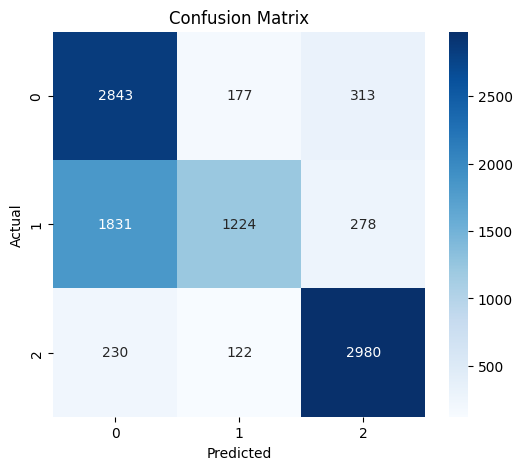


[*** Resultados Finales]
Accuracy: Media = 0.7048 | Std = 0.0000
Precision: Media = 0.7393 | Std = 0.0000
Recall: Media = 0.7048 | Std = 0.0000
F1_score: Media = 0.6859 | Std = 0.0000
Time_train: Media = 41.9409 | Std = 0.0000


In [15]:
import warnings
from transformers import AutoModelForCausalLM, AutoTokenizer
warnings.simplefilter("ignore", category=FutureWarning)

model_name = "unsloth/Llama-3.1-8B-unsloth-bnb-4bit"
print(f"\n🔄 Cargando modelo: {model_name}")
emb_size = 4096

tokenizer = AutoTokenizer.from_pretrained(model_name)

### Datos
params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)

### Experimento
lr = 6e-4
batch_size = 128
dropout = 0.3
n_experiments = 1


run_experiments(tokenizer=tokenizer,
    n_experiments=n_experiments,
    model_builder=model_builder,
    decoder_name=model_name,
    llm_name=model_name,
    emb_size=emb_size,
    model_n_start=125,
    description_base=f"Estudio de diferentes modelos Llama2 con LoRA. Experimento LoRA. Modelo: {model_name} - AdamW, lr={lr}, batch_size={batch_size}, n_experiments={n_experiments}",
    training_loader=training_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=5,
    experiment="Llama-3.1-8B-bnb-4bit",
    r=8,
    lora_alpha=64,
    lora_dropout=0.05,
    weight_decay=1e-5,
    betas=(0.9, 0.95)
)

In [14]:
import numpy as np
from torch.cuda.amp import autocast, GradScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
import torch
from unsloth import FastLanguageModel
from peft import get_peft_model_state_dict


''' -------------------------------------------------------------------------------- '''    
def model_builder(decoder_name, emb_size, lr, r, lora_alpha, lora_dropout, weight_decay, betas):

    max_seq_length = emb_size 
    dtype = None         
    load_in_4bit = True   

    decoder, tokenizer = FastLanguageModel.from_pretrained(
        model_name = decoder_name, 
        max_seq_length = max_seq_length,
        dtype = dtype,
        load_in_4bit = load_in_4bit,
        fast_inference=False
    )


    model = FastLanguageModel.get_peft_model(
        decoder,
        r = r,              
        target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                          "gate_proj", "up_proj", "down_proj",],
        lora_alpha = lora_alpha,
        lora_dropout = lora_dropout,   
        bias = "none",      
        use_gradient_checkpointing = "unsloth", 
        use_rslora = False,  
        loftq_config = None, 
    )


    model_complete = Llama2Classifier_2(model, emb_size, num_classes=3)
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay, betas=betas)
    return model_complete, optimizer


''' -------------------------------------------------------------------------------- '''    
def run_experiments(tokenizer, n_experiments, model_builder, decoder_name, llm_name, emb_size, model_n_start, description_base,
                    training_loader, val_loader, test_loader, learning_rate, batch_size, dropout, patience, experiment,
                    r, lora_alpha, lora_dropout, weight_decay, betas):
    all_metrics = {
        "accuracy": [],
        "precision": [],
        "recall": [],
        "f1_score": [],
        "time_train": []
    }

    experiment_results = []  # Lista para los resultados de cada experimento
    
    model_experiments = []  # Lista para almacenar los mejores modelos de cada experimento

    best_model = None
    best_f1_score = -float('inf')  # Mejor pérdida de validación
    best_model_path = ""

    for i in range(n_experiments):
        print(f"\n\n[*** Experimento {i+1}/{n_experiments}] -----------------------------")
        
        model_n = model_n_start + i
        description = f"{description_base} | Run {i+1}/{n_experiments}"
        
        ### Datos
        params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
        training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)
        
        model, optimizer = model_builder(decoder_name, emb_size, learning_rate, r, lora_alpha, lora_dropout, weight_decay, betas)
        
        # Entrenamiento del modelo
        hyperparams, metrics, test_metrics, cm, best_epoch, total_duration, path = train(
                                                                                    epochs=10, 
                                                                                    model=model,
                                                                                    training_loader=training_loader,
                                                                                    val_loader=val_loader,
                                                                                    optimizer=optimizer,
                                                                                    learning_rate=learning_rate,
                                                                                    batch_size=batch_size,
                                                                                    dropout=dropout,
                                                                                    r = r,
                                                                                    lora_alpha = lora_alpha,
                                                                                    lora_dropout = lora_dropout,
                                                                                    patience=patience,
                                                                                    model_n=model_n,
                                                                                    description=description,
                                                                                    experiment=experiment,
                                                                                )

        model_experiments.append(path)
        test = test_metrics  # Asumimos que test_metrics es un diccionario con las métricas de test

        all_metrics["accuracy"].append(test["accuracy"])
        all_metrics["precision"].append(test["precision"])
        all_metrics["recall"].append(test["recall"])
        all_metrics["f1_score"].append(test["f1_score"])
        all_metrics["time_train"].append(total_duration)

        f1_score = test["f1_score"]

        if f1_score > best_f1_score:  # Si el modelo actual tiene mejor F1-score
            best_f1_score = f1_score
            best_model = model
            best_model_path = f"./Models/exp({experiment})_LoRA_best_model_{model_n}.pth"  # Ruta para este modelo
            best_experiment = {
                "id": model_n,
                "description": description,
                "hyperparameters": hyperparams,
                "metrics": metrics,
                "test_metrics": test_metrics,
                "confusion_matrix": cm.tolist(),
                "best_epoch": best_epoch,
                "time_train": total_duration
            }

    # Eliminacion de los n - 1 modelos peores respecto al mejor
    for path in model_experiments:
        if path != best_model_path:
            try:
                os.remove(path)
                print(f"Modelo eliminado: {path}")
            except FileNotFoundError:
                print(f"[Aviso] No se encontró el archivo para eliminar: {path}")

    
    print(f"\n --- Evaluación del mejor modelo: {best_model_path}")
    print(f"Test Accuracy:  {best_experiment['test_metrics']['accuracy']:.4f}")
    print(f"Test Precision: {best_experiment['test_metrics']['precision']:.4f}")
    print(f"Test Recall:    {best_experiment['test_metrics']['recall']:.4f}")
    print(f"Test F1-score:  {best_experiment['test_metrics']['f1_score']:.4f}")

    print(f"\n --- Matriz de confusión del mejor modelo: ")
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    
    
    # Métricas agregadas
    print("\n[*** Resultados Finales]")
    for metric in all_metrics:
        values = np.array(all_metrics[metric])
        print(f"{metric.capitalize()}: Media = {values.mean():.4f} | Std = {values.std():.4f}")

    # Guardado de todos los experimentos en un archivo JSON
    experiment_data = {
        "id_experiment": f"experiment_{experiment}",  # ID único para el experimento grande
        "llm_name": llm_name,
        "best_experiment": best_experiment,
        "aggregated_metrics": {
            "accuracy_mean": np.mean(all_metrics["accuracy"]),
            "accuracy_std": np.std(all_metrics["accuracy"]),
            "precision_mean": np.mean(all_metrics["precision"]),
            "precision_std": np.std(all_metrics["precision"]),
            "recall_mean": np.mean(all_metrics["recall"]),
            "recall_std": np.std(all_metrics["recall"]),
            "f1_score_mean": np.mean(all_metrics["f1_score"]),
            "f1_score_std": np.std(all_metrics["f1_score"]),
            "time_train_mean": np.mean(all_metrics["time_train"]),
            "time_train_std": np.std(all_metrics["time_train"])
        },
        "best_model_path": best_model_path  # Lista con los mejores modelos de cada experimento
    }

    try:
        with open("./diverse_llama2_LoRA.json", "r") as f:
            all_experiments = json.load(f)
    except (FileNotFoundError, json.JSONDecodeError):
        all_experiments = []

    all_experiments.append(experiment_data)

    with open("./diverse_llama2_LoRA.json", "w") as f:
        json.dump(all_experiments, f, indent=4)




''' -------------------------------------------------------------------------------- '''
def evaluate_test(model, test_loader, best_model_path, show_cm=None):
    
    checkpoint = torch.load(best_model_path, map_location=device)
    model.decoder.load_state_dict(checkpoint["lora"], strict=False)
    model.linear_projection.load_state_dict(checkpoint["projection"])
    model.classifier.load_state_dict(checkpoint["classifier"])
        
    model.eval()
    
    all_preds, all_labels = [], []
    all_labels = []
    with torch.no_grad():
        for data in test_loader:
            inputs_embeds = data['inputs_embeds'].to(device)
            attention_mask = data['attention_mask'].to(device).to(torch.float32)
            labels = data['labels'].to(device).long()
            
            logits = model(inputs_embeds, attention_mask)
            preds = torch.argmax(logits, dim=1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    acc = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
    test_metrics = {"accuracy": acc, "precision": precision, "recall": recall, "f1_score": f1}

    cm = confusion_matrix(all_labels, all_preds)
    
    print(f"Test Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    
    if show_cm:
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()

    return test_metrics, cm


''' -------------------------------------------------------------------------------- '''
def train(epochs, model, training_loader, val_loader, optimizer, learning_rate, batch_size, dropout, r, lora_alpha, lora_dropout, patience=3, model_n=0, description="", experiment=""):
    model.train()
    model.to(device)  
    
    batches = len(training_loader)
    scaler = GradScaler()
    
    metrics = {"train": [], "val": []}
    total_start_time = time.time()
    best_f1_score = 0.0
    best_model_path = f"./Models/exp({experiment})_LoRA_best_model_{model_n}.pth"
    no_improve_epochs = 0
        
    for epoch in range(epochs):
        total_loss = 0
        total_correct = 0
        total_samples = 0
        epoch_start_time = time.time()

        for i, data in enumerate(training_loader, 0):
            inputs_embeds = data['inputs_embeds'].to(device).to(model.decoder.dtype)
            attention_mask = data['attention_mask'].to(device).to(model.decoder.dtype)
            labels = data['labels'].to(device).long()
    
            optimizer.zero_grad()
    
            logits = model(inputs_embeds, attention_mask)
            loss = loss_fn(logits, labels)
    
            scaler.scale(loss).backward()
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            scaler.step(optimizer) 
            scaler.update()
            
            total_loss += loss.item()
            preds = torch.argmax(logits, dim=1)
            total_correct += (preds == labels).sum().item()
            total_samples += labels.size(0)
        
        train_loss = total_loss / batches
        train_acc = total_correct / total_samples
        
        model.eval()
        val_loss, all_preds, all_labels = 0, [], []
        with torch.no_grad():
            for data in val_loader:
                inputs_embeds = data['inputs_embeds'].to(device).to(model.decoder.dtype)
                attention_mask = data['attention_mask'].to(device).to(model.decoder.dtype)
                labels = data['labels'].to(device).long()
                
                logits = model(inputs_embeds, attention_mask)
                loss = loss_fn(logits, labels)
                val_loss += loss.item()
                preds = torch.argmax(logits, dim=1)
                
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        
        val_loss /= len(val_loader)
        acc = accuracy_score(all_labels, all_preds)
        precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')

        model.train()
        
        epoch_duration = (time.time() - epoch_start_time) / 60
        print(f"Epoch {epoch+1}/{epochs} | tr_loss: {train_loss:.4f}, tr_acc: {train_acc:.4f}, val_loss: {val_loss:.4f}, val_acc: {acc:.4f}, Prec: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

        metrics["train"].append({"epoch": epoch+1, "loss": train_loss, "accuracy": train_acc})
        metrics["val"].append({"epoch": epoch+1, "loss": val_loss, "accuracy": acc, "precision": precision, "recall": recall, "f1_score": f1})
        
        if f1 > best_f1_score:
            best_f1_score = f1
            best_epoch = epoch + 1
            torch.save({
                "lora": model.decoder.state_dict(),
                "classifier": model.classifier.state_dict(),
                "projection": model.linear_projection.state_dict(),
            }, best_model_path)
            no_improve_epochs = 0
        else:
            no_improve_epochs += 1
        
        if no_improve_epochs >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs.")
            break
    
    total_duration = (time.time() - total_start_time) / 60  
    print(f"Total training time: {total_duration:.2f} min")
    
    test_metrics, cm = evaluate_test(model, test_loader, best_model_path, show_cm=False)
    hyperparams = {
        "epochs": epochs,
        "optimizer": str(optimizer),
        "learning_rate": learning_rate,
        "batch_size": batch_size,
        "dropout": dropout,
        "patience": patience,
        "r": r,
        "lora_alpha": lora_alpha,
        "lora_dropout": lora_dropout
    }

    return hyperparams, metrics, test_metrics, cm, best_epoch, total_duration, best_model_path



🔄 Cargando modelo: unsloth/Llama-3.1-8B-unsloth-bnb-4bit


[*** Experimento 1/1] -----------------------------
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA RTX 4500 Ada Generation. Num GPUs = 1. Max memory: 23.656 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: Dropout = 0 is supported for fast patching. You are using dropout = 0.05.
Unsloth will patch all other layers, except LoRA matrices, causing a performance hit.
Unsloth 2025.3.19 patched 32 layers with 0 QKV layers, 0 O layers and 0 MLP layers.


Unsloth: Will smartly offload gradients to save VRAM!
Epoch 1/10 | tr_loss: 1.8143, tr_acc: 0.5143, val_loss: 0.9446, val_acc: 0.4697, Prec: 0.5964, Recall: 0.4697, F1-score: 0.4710
Epoch 2/10 | tr_loss: 0.7795, tr_acc: 0.7135, val_loss: 0.8425, val_acc: 0.6873, Prec: 0.7803, Recall: 0.6873, F1-score: 0.6450
Epoch 3/10 | tr_loss: 0.6397, tr_acc: 0.7805, val_loss: 0.7454, val_acc: 0.6964, Prec: 0.7493, Recall: 0.6964, F1-score: 0.6758
Epoch 4/10 | tr_loss: 0.6200, tr_acc: 0.7830, val_loss: 0.6746, val_acc: 0.7155, Prec: 0.7795, Recall: 0.7155, F1-score: 0.6821
Epoch 5/10 | tr_loss: 0.5863, tr_acc: 0.7919, val_loss: 0.7139, val_acc: 0.7284, Prec: 0.7653, Recall: 0.7284, F1-score: 0.7091
Epoch 6/10 | tr_loss: 0.5699, tr_acc: 0.7972, val_loss: 0.8735, val_acc: 0.6845, Prec: 0.7561, Recall: 0.6845, F1-score: 0.6704
Epoch 7/10 | tr_loss: 0.5300, tr_acc: 0.8103, val_loss: 0.8443, val_acc: 0.6727, Prec: 0.7655, Recall: 0.6727, F1-score: 0.6505
Epoch 8/10 | tr_loss: 0.5120, tr_acc: 0.8154, val_

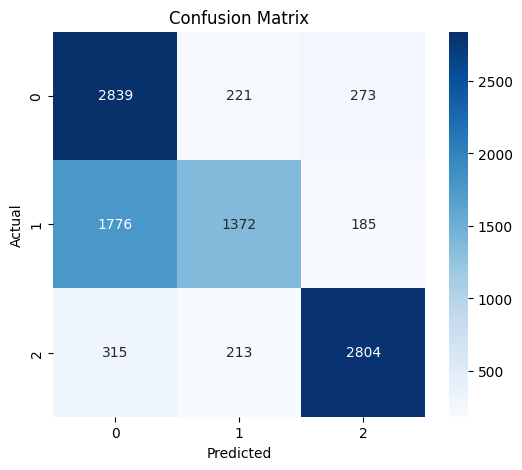


[*** Resultados Finales]
Accuracy: Media = 0.7016 | Std = 0.0000
Precision: Media = 0.7317 | Std = 0.0000
Recall: Media = 0.7016 | Std = 0.0000
F1_score: Media = 0.6905 | Std = 0.0000
Time_train: Media = 80.9223 | Std = 0.0000


In [17]:
import warnings
from transformers import AutoModelForCausalLM, AutoTokenizer
warnings.simplefilter("ignore", category=FutureWarning)

model_name = "unsloth/Llama-3.1-8B-unsloth-bnb-4bit"
print(f"\n🔄 Cargando modelo: {model_name}")
emb_size = 4096

tokenizer = AutoTokenizer.from_pretrained(model_name)

### Datos
params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)

### Experimento
lr = 6e-4
batch_size = 128
dropout = 0.3
n_experiments = 1


run_experiments(tokenizer=tokenizer,
    n_experiments=n_experiments,
    model_builder=model_builder,
    decoder_name=model_name,
    llm_name=model_name,
    emb_size=emb_size,
    model_n_start=125,
    description_base=f"Estudio de diferentes modelos Llama2 con LoRA. Experimento LoRA. Modelo: {model_name} - AdamW, lr={lr}, batch_size={batch_size}, n_experiments={n_experiments}",
    training_loader=training_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=5,
    experiment="Llama-3.1-8B-bnb-4bit",
    r=8,
    lora_alpha=64,
    lora_dropout=0.05,
    weight_decay=1e-5,
    betas=(0.9, 0.95)
)


🔄 Cargando modelo: unsloth/Llama-3.1-8B-unsloth-bnb-4bit


[*** Experimento 1/1] -----------------------------
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA RTX 4500 Ada Generation. Num GPUs = 1. Max memory: 23.656 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: Will smartly offload gradients to save VRAM!
Epoch 1/10 | tr_loss: 1.7456, tr_acc: 0.5032, val_loss: 1.1462, val_acc: 0.4359, Prec: 0.5167, Recall: 0.4359, F1-score: 0.3985
Epoch 2/10 | tr_loss: 1.1946, tr_acc: 0.6191, val_loss: 1.1276, val_acc: 0.6178, Prec: 0.6896, Recall: 0.6178, F1-score: 0.5910
Epoch 3/10 | tr_loss: 0.9733, tr_acc: 0.6761, val_loss: 0.8672, val_acc: 0.6302, Prec: 0.7087, Recal

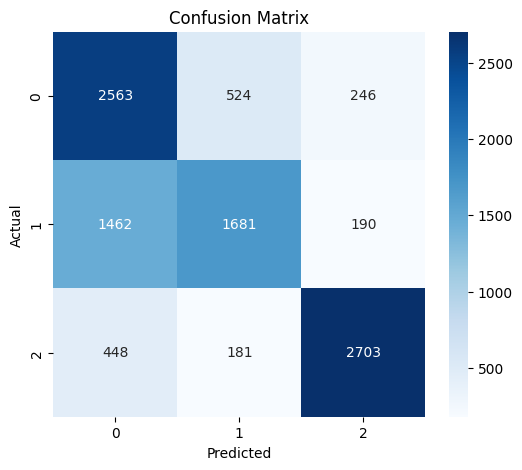


[*** Resultados Finales]
Accuracy: Media = 0.6948 | Std = 0.0000
Precision: Media = 0.7129 | Std = 0.0000
Recall: Media = 0.6948 | Std = 0.0000
F1_score: Media = 0.6933 | Std = 0.0000
Time_train: Media = 79.0259 | Std = 0.0000


In [17]:
import warnings
from transformers import AutoModelForCausalLM, AutoTokenizer
warnings.simplefilter("ignore", category=FutureWarning)

model_name = "unsloth/Llama-3.1-8B-unsloth-bnb-4bit"
print(f"\n🔄 Cargando modelo: {model_name}")
emb_size = 4096

tokenizer = AutoTokenizer.from_pretrained(model_name)

### Datos
params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)

### Experimento
lr = 6e-4
batch_size = 128
dropout = 0.3
n_experiments = 1


run_experiments(tokenizer=tokenizer,
    n_experiments=n_experiments,
    model_builder=model_builder,
    decoder_name=model_name,
    llm_name=model_name,
    emb_size=emb_size,
    model_n_start=125,
    description_base=f"Estudio de diferentes modelos Llama2 con LoRA. Experimento LoRA. Modelo: {model_name} - AdamW, lr={lr}, batch_size={batch_size}, n_experiments={n_experiments}",
    training_loader=training_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=5,
    experiment="Llama-3.1-8B-bnb-4bit",
    r=10,
    lora_alpha=64,
    lora_dropout=0.05,
    weight_decay=1e-5,
    betas=(0.9, 0.95)
)


🔄 Cargando modelo: unsloth/Llama-3.1-8B-unsloth-bnb-4bit


[*** Experimento 1/1] -----------------------------
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA RTX 4500 Ada Generation. Num GPUs = 1. Max memory: 23.656 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: Dropout = 0 is supported for fast patching. You are using dropout = 0.05.
Unsloth will patch all other layers, except LoRA matrices, causing a performance hit.
Unsloth 2025.3.19 patched 32 layers with 0 QKV layers, 0 O layers and 0 MLP layers.


Unsloth: Will smartly offload gradients to save VRAM!


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10 | tr_loss: 1.7497, tr_acc: 0.4913, val_loss: 1.5805, val_acc: 0.5255, Prec: 0.3466, Recall: 0.5255, F1-score: 0.4133
Epoch 2/10 | tr_loss: 1.3443, tr_acc: 0.5982, val_loss: 1.2114, val_acc: 0.5116, Prec: 0.6662, Recall: 0.5116, F1-score: 0.4846
Epoch 3/10 | tr_loss: 1.0822, tr_acc: 0.6381, val_loss: 0.8799, val_acc: 0.6156, Prec: 0.6362, Recall: 0.6156, F1-score: 0.6133
Epoch 4/10 | tr_loss: 0.9106, tr_acc: 0.6977, val_loss: 1.0158, val_acc: 0.6382, Prec: 0.6395, Recall: 0.6382, F1-score: 0.6238
Epoch 5/10 | tr_loss: 0.8585, tr_acc: 0.7159, val_loss: 0.8258, val_acc: 0.6861, Prec: 0.6819, Recall: 0.6861, F1-score: 0.6819
Epoch 6/10 | tr_loss: 0.9667, tr_acc: 0.6269, val_loss: 0.9482, val_acc: 0.5637, Prec: 0.6897, Recall: 0.5637, F1-score: 0.5446
Epoch 7/10 | tr_loss: 0.8014, tr_acc: 0.6694, val_loss: 0.9363, val_acc: 0.6150, Prec: 0.7345, Recall: 0.6150, F1-score: 0.6053
Epoch 8/10 | tr_loss: 0.6551, tr_acc: 0.7639, val_loss: 0.8712, val_acc: 0.7201, Prec: 0.7661, Recall: 0

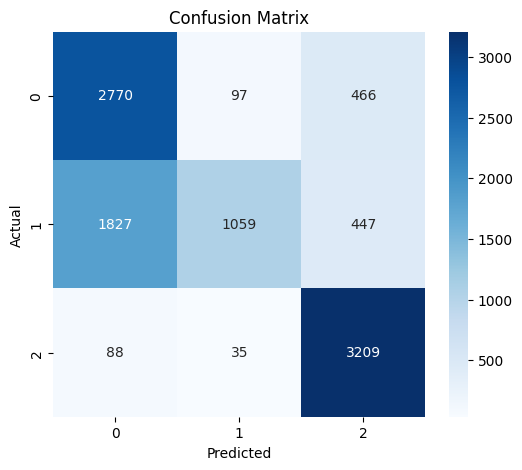


[*** Resultados Finales]
Accuracy: Media = 0.7039 | Std = 0.0000
Precision: Media = 0.7530 | Std = 0.0000
Recall: Media = 0.7039 | Std = 0.0000
F1_score: Media = 0.6734 | Std = 0.0000
Time_train: Media = 81.9909 | Std = 0.0000


In [16]:
import warnings
from transformers import AutoModelForCausalLM, AutoTokenizer
warnings.simplefilter("ignore", category=FutureWarning)

model_name = "unsloth/Llama-3.1-8B-unsloth-bnb-4bit"
print(f"\n🔄 Cargando modelo: {model_name}")
emb_size = 4096

tokenizer = AutoTokenizer.from_pretrained(model_name)

### Datos
params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)

### Experimento
lr = 6e-4
batch_size = 128
dropout = 0.3
n_experiments = 1


run_experiments(tokenizer=tokenizer,
    n_experiments=n_experiments,
    model_builder=model_builder,
    decoder_name=model_name,
    llm_name=model_name,
    emb_size=emb_size,
    model_n_start=125,
    description_base=f"Estudio de diferentes modelos Llama2 con LoRA. Experimento LoRA. Modelo: {model_name} - AdamW, lr={lr}, batch_size={batch_size}, n_experiments={n_experiments}",
    training_loader=training_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=5,
    experiment="Llama-3.1-8B-bnb-4bit",
    r=8,
    lora_alpha=64,
    lora_dropout=0.05,
    weight_decay=1e-4,
    betas=(0.9, 0.95)
)


🔄 Cargando modelo: unsloth/Llama-3.1-8B-unsloth-bnb-4bit


[*** Experimento 1/1] -----------------------------
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA RTX 4500 Ada Generation. Num GPUs = 1. Max memory: 23.656 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: Dropout = 0 is supported for fast patching. You are using dropout = 0.05.
Unsloth will patch all other layers, except LoRA matrices, causing a performance hit.


Epoch 1/10 | tr_loss: 1.8143, tr_acc: 0.5143, val_loss: 0.9446, val_acc: 0.4697, Prec: 0.5964, Recall: 0.4697, F1-score: 0.4710
Epoch 2/10 | tr_loss: 0.7795, tr_acc: 0.7135, val_loss: 0.8425, val_acc: 0.6873, Prec: 0.7803, Recall: 0.6873, F1-score: 0.6450
Epoch 3/10 | tr_loss: 0.6397, tr_acc: 0.7805, val_loss: 0.7454, val_acc: 0.6964, Prec: 0.7493, Recall: 0.6964, F1-score: 0.6758
Epoch 4/10 | tr_loss: 0.6200, tr_acc: 0.7830, val_loss: 0.6746, val_acc: 0.7155, Prec: 0.7795, Recall: 0.7155, F1-score: 0.6821
Epoch 5/10 | tr_loss: 0.5863, tr_acc: 0.7919, val_loss: 0.7139, val_acc: 0.7284, Prec: 0.7653, Recall: 0.7284, F1-score: 0.7091
Epoch 6/10 | tr_loss: 0.5699, tr_acc: 0.7972, val_loss: 0.8735, val_acc: 0.6845, Prec: 0.7561, Recall: 0.6845, F1-score: 0.6704
Epoch 7/10 | tr_loss: 0.5300, tr_acc: 0.8103, val_loss: 0.8443, val_acc: 0.6727, Prec: 0.7655, Recall: 0.6727, F1-score: 0.6505
Epoch 8/10 | tr_loss: 0.5120, tr_acc: 0.8154, val_loss: 0.7093, val_acc: 0.7183, Prec: 0.7884, Recall: 0

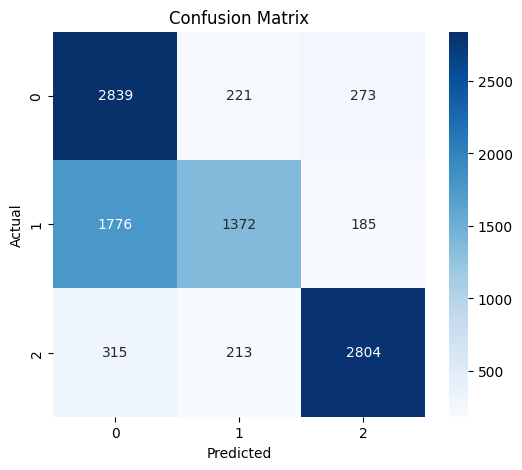


[*** Resultados Finales]
Accuracy: Media = 0.7016 | Std = 0.0000
Precision: Media = 0.7317 | Std = 0.0000
Recall: Media = 0.7016 | Std = 0.0000
F1_score: Media = 0.6905 | Std = 0.0000
Time_train: Media = 80.8479 | Std = 0.0000


In [18]:
import warnings
from transformers import AutoModelForCausalLM, AutoTokenizer
warnings.simplefilter("ignore", category=FutureWarning)

model_name = "unsloth/Llama-3.1-8B-unsloth-bnb-4bit"
print(f"\n🔄 Cargando modelo: {model_name}")
emb_size = 4096

tokenizer = AutoTokenizer.from_pretrained(model_name)

### Datos
params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)

### Experimento
lr = 6e-4
batch_size = 128
dropout = 0.3
n_experiments = 1


run_experiments(tokenizer=tokenizer,
    n_experiments=n_experiments,
    model_builder=model_builder,
    decoder_name=model_name,
    llm_name=model_name,
    emb_size=emb_size,
    model_n_start=135,
    description_base=f"Estudio de diferentes modelos Llama2 con LoRA. Experimento LoRA. Modelo: {model_name} - AdamW, lr={lr}, batch_size={batch_size}, n_experiments={n_experiments}",
    training_loader=training_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=5,
    experiment="Llama-3.1-8B-bnb-4bit",
    r=8,
    lora_alpha=64,
    lora_dropout=0.05,
    weight_decay=1e-7,
    betas=(0.9, 0.95)
)


🔄 Cargando modelo: unsloth/Llama-3.1-8B-unsloth-bnb-4bit


[*** Experimento 1/1] -----------------------------
==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    NVIDIA RTX 4500 Ada Generation. Num GPUs = 1. Max memory: 23.656 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth: Dropout = 0 is supported for fast patching. You are using dropout = 0.05.
Unsloth will patch all other layers, except LoRA matrices, causing a performance hit.
Unsloth 2025.3.19 patched 32 layers with 0 QKV layers, 0 O layers and 0 MLP layers.


Unsloth: Will smartly offload gradients to save VRAM!
Epoch 1/10 | tr_loss: 1.7456, tr_acc: 0.5032, val_loss: 1.1462, val_acc: 0.4359, Prec: 0.5167, Recall: 0.4359, F1-score: 0.3985
Epoch 2/10 | tr_loss: 1.1946, tr_acc: 0.6191, val_loss: 1.1276, val_acc: 0.6178, Prec: 0.6896, Recall: 0.6178, F1-score: 0.5910
Epoch 3/10 | tr_loss: 0.9733, tr_acc: 0.6761, val_loss: 0.8672, val_acc: 0.6302, Prec: 0.7087, Recall: 0.6302, F1-score: 0.6209
Epoch 4/10 | tr_loss: 0.7155, tr_acc: 0.7481, val_loss: 0.7571, val_acc: 0.7194, Prec: 0.7847, Recall: 0.7194, F1-score: 0.6870
Epoch 5/10 | tr_loss: 0.9369, tr_acc: 0.6878, val_loss: 1.4845, val_acc: 0.4633, Prec: 0.6023, Recall: 0.4633, F1-score: 0.3699
Epoch 6/10 | tr_loss: 0.8244, tr_acc: 0.7314, val_loss: 0.6548, val_acc: 0.7187, Prec: 0.7359, Recall: 0.7187, F1-score: 0.7176
Epoch 7/10 | tr_loss: 0.5686, tr_acc: 0.7925, val_loss: 0.7464, val_acc: 0.6944, Prec: 0.7843, Recall: 0.6944, F1-score: 0.6790
Epoch 8/10 | tr_loss: 0.5235, tr_acc: 0.8074, val_

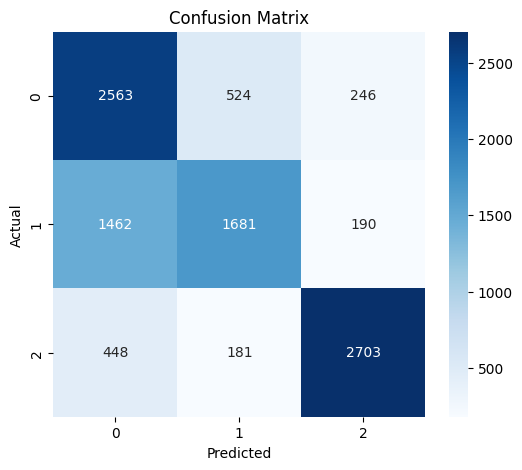


[*** Resultados Finales]
Accuracy: Media = 0.6948 | Std = 0.0000
Precision: Media = 0.7129 | Std = 0.0000
Recall: Media = 0.6948 | Std = 0.0000
F1_score: Media = 0.6933 | Std = 0.0000
Time_train: Media = 81.2536 | Std = 0.0000


In [15]:
import warnings
from transformers import AutoModelForCausalLM, AutoTokenizer
warnings.simplefilter("ignore", category=FutureWarning)

model_name = "unsloth/Llama-3.1-8B-unsloth-bnb-4bit"
print(f"\n🔄 Cargando modelo: {model_name}")
emb_size = 4096

tokenizer = AutoTokenizer.from_pretrained(model_name)

### Datos
params = {'batch_size': 128, 'shuffle': True, 'num_workers': 0}
training_loader, val_loader, test_loader = inicialize_loaders(df_train, df_val, df_test, tokenizer, device, params)

### Experimento
lr = 6e-4
batch_size = 128
dropout = 0.3
n_experiments = 1


run_experiments(tokenizer=tokenizer,
    n_experiments=n_experiments,
    model_builder=model_builder,
    decoder_name=model_name,
    llm_name=model_name,
    emb_size=emb_size,
    model_n_start=138,
    description_base=f"Estudio de diferentes modelos Llama2 con LoRA. Experimento LoRA. Modelo: {model_name} - AdamW, lr={lr}, batch_size={batch_size}, n_experiments={n_experiments}",
    training_loader=training_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    learning_rate=lr,
    batch_size=batch_size,
    dropout=dropout,
    patience=5,
    experiment="Llama-3.1-8B-bnb-4bit",
    r=10,
    lora_alpha=64,
    lora_dropout=0.05,
    weight_decay=1e-7,
    betas=(0.9, 0.95)
)

In [17]:
import json

# IDs que quieres conservar
allowed_ids = {1, 5, 138}

# Cargar el JSON
with open("diverse_llama2_LoRA.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Filtrar por ID dentro de best_experiment
filtered_data = [
    entry for entry in data
    if "best_experiment" in entry and int(str(entry["best_experiment"].get("id", -1)).replace("id", "")) in allowed_ids
]

# Guardar el resultado
with open("filtered_llama2_LoRA.json", "w", encoding="utf-8") as f:
    json.dump(filtered_data, f, indent=4, ensure_ascii=False)